In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

### DATA CLEANING AND EXPLORATORY ANALYSIS

In [4]:
mydf = pd.read_csv("NYC_rest_inspection.csv")

In [5]:
len(mydf)

213679

In [6]:
mydf.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50113122,CHARLES PAN-FRIED CHICKEN,Manhattan,146,WEST 72 STREET,10023.0,6465900662,NaN,01/01/1900,NaN,...,NaN,40.778057,-73.980365,107.0,6.0,15700.0,1081482.0,1.011430e+09,MN14,NaN
1,50139503,BODEGA LOUNGE,Brooklyn,1170,NOSTRAND AVENUE,11225.0,6466854041,NaN,01/01/1900,NaN,...,NaN,40.658917,-73.950453,309.0,40.0,80200.0,3115472.0,3.050390e+09,BK60,NaN
2,50143756,NaN,Brooklyn,2051,86 STREET,11214.0,6466375666,NaN,01/01/1900,NaN,...,NaN,40.603854,-73.996997,311.0,43.0,28800.0,3165861.0,3.063460e+09,BK28,NaN
3,50141260,PIG & BUTTER AVE B,Manhattan,42,AVENUE B,10009.0,9174078161,NaN,01/01/1900,NaN,...,NaN,40.722866,-73.982831,103.0,2.0,3200.0,1004997.0,1.003990e+09,MN22,NaN
4,50146522,Danis Roastery Inc,Brooklyn,378,MYRTLE AVENUE,11205.0,19178566190,NaN,01/01/1900,NaN,...,NaN,40.693165,-73.971090,302.0,35.0,18300.0,3058371.0,3.020740e+09,BK68,NaN


In [7]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213679 entries, 0 to 213678
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  213679 non-null  int64  
 1   DBA                    212957 non-null  object 
 2   BORO                   213679 non-null  object 
 3   BUILDING               213363 non-null  object 
 4   STREET                 213677 non-null  object 
 5   ZIPCODE                210981 non-null  float64
 6   PHONE                  213677 non-null  object 
 7   CUISINE DESCRIPTION    211150 non-null  object 
 8   INSPECTION DATE        213679 non-null  object 
 9   ACTION                 211150 non-null  object 
 10  VIOLATION CODE         210024 non-null  object 
 11  VIOLATION DESCRIPTION  210024 non-null  object 
 12  CRITICAL FLAG          213679 non-null  object 
 13  SCORE                  203298 non-null  float64
 14  GRADE                  104095 non-nu

In [8]:
empty_columns = mydf.columns[mydf.isnull().all()]
print(empty_columns)

Index(['Location Point1'], dtype='object')


In [9]:
mydf.columns = mydf.columns.str.strip()

In [10]:
columns_remove=['Community Board','Council District','Census Tract','BIN','BBL','NTA','Location Point1','PHONE']

In [11]:
mydf = mydf.drop(columns=columns_remove)

In [12]:
mydf['INSPECTION DATE'] = pd.to_datetime(mydf['INSPECTION DATE']).dt.date
mydf['RECORD DATE'] = pd.to_datetime(mydf['RECORD DATE']).dt.date

In [13]:
mydf['INSPECTION DATE'] = pd.to_datetime(mydf['INSPECTION DATE'], errors='coerce')
mydf_filter1 = mydf.loc[mydf['INSPECTION DATE'].dt.year == 1900]

In [14]:
num_rows_filtered = len(mydf_filter1)  # Using len() function

print("Number of rows in mydf_filter1:", num_rows_filtered)

Number of rows in mydf_filter1: 2529


In [15]:
empty_columns2 = mydf_filter1.columns[mydf_filter1.isnull().all()]
print(empty_columns2)

Index(['CUISINE DESCRIPTION', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'SCORE', 'GRADE', 'GRADE DATE',
       'INSPECTION TYPE'],
      dtype='object')


In [16]:
mydf = mydf[mydf['INSPECTION DATE'].dt.year != 1900]

In [17]:
mydf['VIOLATION CODE'].unique()

array(['02B', '09B', '10J', nan, '04A', '22F', '04M', '04L', '06F',
       '19-10', '09C', '18F', '05A', '20F', '04K', '10H', '09E', '02I',
       '10C', '15-21', '10E', '03F', '15-01', '15F6', '03I', '20-06',
       '20-08', '08A', '06D', '10B', '06C', '10F', '09A', '02G', '06B',
       '04C', '10D', '08B', '08C', '04J', '10G', '06A', '02H', '05H',
       '20-04', '04N', '04H', '06E', '05D', '05F', '28-03', '22A',
       '18-11', '28-06', '02F', '20A', '20-01', '28-01', '20D', '10A',
       '10I', '19-04', '22C', '04O', '02C', '19-05', '18-08', '05C',
       '16-04', '16-03', '06G', '19-06', '03B', '19-07', '16-02', '15-27',
       '03A', '28-04', '04E', '22G', '16B', '02A', '19-11', '04D', '09D',
       '22E', '15-42', '28-05', '16E', '15E2', '16D', '16-06', '18G',
       '15-37', '18-12', '15E3', '16C', '05E', '03C', '18-01', '15-36',
       '06H', '04F', '16A', '20E', '15F7', '16-01', '03E', '20-05', '05B',
       '18-02', '04B', '15-22', '18-13', '18D', '20-07', '18-14', '02D',
  

In [18]:
rows_with_empty_CAMIS = mydf[mydf['CAMIS'].isna()]
print(rows_with_empty_CAMIS)

Empty DataFrame
Columns: [CAMIS, DBA, BORO, BUILDING, STREET, ZIPCODE, CUISINE DESCRIPTION, INSPECTION DATE, ACTION, VIOLATION CODE, VIOLATION DESCRIPTION, CRITICAL FLAG, SCORE, GRADE, GRADE DATE, RECORD DATE, INSPECTION TYPE, Latitude, Longitude]
Index: []


In [19]:
rows_with_empty_CAMIS = mydf[mydf['SCORE'].isna()]
rows_with_empty_CAMIS.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
65,41203533,GREAT TASTE BAKERY,Manhattan,3335,CATHERINE STREET,NaN,Bakery Products/Desserts,2021-08-16,Violations were cited in the following area(s).,22F,MISBRANDED AND LABELING,Not Critical,NaN,NaN,NaN,2024-01-25,Administrative Miscellaneous / Initial Inspection,0.000000,0.000000
85,50137867,SUSHI HAYASHI,Manhattan,355,EAST 50 STREET,10022.0,Japanese,2023-08-23,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,N,NaN,2024-01-25,Administrative Miscellaneous / Initial Inspection,40.754342,-73.967252


#### Rows where DBA in empty

In [21]:
rows_with_empty_DBA = mydf[mydf['DBA'].isna()]
print(rows_with_empty_DBA)

Empty DataFrame
Columns: [CAMIS, DBA, BORO, BUILDING, STREET, ZIPCODE, CUISINE DESCRIPTION, INSPECTION DATE, ACTION, VIOLATION CODE, VIOLATION DESCRIPTION, CRITICAL FLAG, SCORE, GRADE, GRADE DATE, RECORD DATE, INSPECTION TYPE, Latitude, Longitude]
Index: []


#### Rows where VIOLATION CODE in empty

In [23]:
rows_empty_VCODE_1 = mydf[mydf['VIOLATION CODE'].isna()]
rows_empty_VCODE_1.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
35,40696959,JAMAICAN FLAVORS,Queens,16417,JAMAICA AVENUE,11432.0,Caribbean,2019-11-07,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaN,2024-01-25,Cycle Inspection / Initial Inspection,40.705231,-73.795483
40,50088439,STARBUCKS COFFEE #52530,Queens,3202,FRANCIS LEWIS BLVD,11358.0,Coffee/Tea,2024-01-09,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,01/09/2024,2024-01-25,Cycle Inspection / Initial Inspection,40.768812,-73.791818
50,50106561,TEMASKE,Manhattan,157,2 AVENUE,10003.0,Japanese,2022-01-12,Establishment re-opened by DOHMH.,NaN,NaN,Not Applicable,0.0,NaN,NaN,2024-01-25,Pre-permit (Operational) / Reopening Inspection,40.729547,-73.986986


In [24]:
rows_empty_VCODE_1['VIOLATION CODE'].unique()

array([nan], dtype=object)

 We will check in this dataset the unique values for __'Violation Description'__

In [25]:
rows_empty_VCODE_1['VIOLATION DESCRIPTION'].unique()

array([nan], dtype=object)

We realize that all the values are empty in Violation Description column, now we will move to __Score__

Checking the unique values for __Score__

In [26]:
rows_empty_VCODE_1['SCORE'].unique()

array([ 0., nan])

In [27]:
rows_empty_VCODE_1['GRADE'].unique()

array([nan, 'A', 'N', 'P', 'Z', 'C'], dtype=object)

In [28]:
rows_empty_VCODE_2 = rows_empty_VCODE_1[rows_empty_VCODE_1['SCORE'].isna()]
len(rows_empty_VCODE_2)

500

In [29]:
rows_empty_VCODE_2.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
85,50137867,SUSHI HAYASHI,Manhattan,355,EAST 50 STREET,10022.0,Japanese,2023-08-23,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,N,NaN,2024-01-25,Administrative Miscellaneous / Initial Inspection,40.754342,-73.967252
105,50104198,GOLDEN KRUST CARIBBEAN BAKERY & GRILL,Brooklyn,1848,EAST NEW YORK AVENUE,11207.0,Caribbean,2022-05-24,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,2024-01-25,Trans Fat / Initial Inspection,40.676610,-73.900666
117,50051535,PABELLON,Bronx,1501,WESTCHESTER AVENUE,10472.0,Chinese,2023-06-14,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,2024-01-25,Administrative Miscellaneous / Initial Inspection,40.828524,-73.879968


In [30]:
rows_empty_VCODE_2['VIOLATION CODE'].unique()

array([nan], dtype=object)

### Working in the data preparation for the model

In [31]:
mydf = mydf[(mydf['GRADE'].notna()) & (mydf['GRADE'] != 0)]

In [34]:
#### We consider the grades 

In [32]:
mydf = mydf[mydf['GRADE'].isin(['A', 'B','C'])]

In [33]:
mydf = mydf[mydf['VIOLATION CODE'].notna()]

In [34]:
mydf.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
21,50081660,FIVE BOROUGH FOOD EMPORIUM,Manhattan,NaN,CENTRAL TERMINAL BUILDING,11371.0,American,2018-12-13,Violations were cited in the following area(s).,10J,Hand wash sign not posted,Not Critical,11.0,A,12/13/2018,2024-01-25,Pre-permit (Operational) / Initial Inspection,NaN,NaN
92,50048300,DYNASTY,Queens,14718,NORTHERN BLVD,11354.0,Chinese,2022-04-15,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,12.0,A,04/15/2022,2024-01-25,Cycle Inspection / Initial Inspection,40.765159,-73.819092
97,41395345,CITI FIELD JIM BEAM HIGH BALLERS CLUB,Queens,NKA,126 STREET & ROOSEVELT AVENUE,NaN,American,2018-06-05,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,9.0,A,06/05/2018,2024-01-25,Cycle Inspection / Initial Inspection,0.000000,0.000000


In [35]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90862 entries, 21 to 213678
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CAMIS                  90862 non-null  int64         
 1   DBA                    90862 non-null  object        
 2   BORO                   90862 non-null  object        
 3   BUILDING               90646 non-null  object        
 4   STREET                 90862 non-null  object        
 5   ZIPCODE                89464 non-null  float64       
 6   CUISINE DESCRIPTION    90862 non-null  object        
 7   INSPECTION DATE        90862 non-null  datetime64[ns]
 8   ACTION                 90862 non-null  object        
 9   VIOLATION CODE         90862 non-null  object        
 10  VIOLATION DESCRIPTION  90862 non-null  object        
 11  CRITICAL FLAG          90862 non-null  object        
 12  SCORE                  90859 non-null  float64       
 13  GRAD

 #### We verify that we do not have empty rows

In [36]:
selected_columns = ['VIOLATION CODE', 'GRADE','GRADE DATE']  # Replace with your selected columns

# Check for empty values in selected columns
empty_rows_exist = mydf[selected_columns].isna().any(axis=1).any()
empty_rows_exist

False

In [37]:
# Convert 'GRADE DATE' column to datetime format
mydf['GRADE DATE'] = pd.to_datetime(mydf['GRADE DATE'], errors='coerce')  # 'coerce' will handle any invalid dates

# Check the data types of columns
print(mydf.dtypes)

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE                      object
INSPECTION TYPE                  object
Latitude                        float64
Longitude                       float64
dtype: object


In [38]:
#We include a new key , in order to identify a inspection instead , and merging later the violations
mydf['GRADE DATE'] = pd.to_datetime(mydf['GRADE DATE'])
mydf['KEY'] = mydf['CAMIS'].astype(str) + '-' + mydf['GRADE DATE'].dt.strftime('%Y%m%d')

In [39]:
unique_violations = mydf['VIOLATION CODE'].unique()
unique_violations

array(['10J', '09B', '02B', '06F', '04M', '09C', '09E', '02I', '10C',
       '04A', '10E', '04L', '04K', '10H', '06D', '10B', '06C', '08A',
       '10F', '09A', '02G', '10D', '08B', '08C', '06A', '04N', '05F',
       '04J', '10G', '04C', '04H', '05D', '10A', '10I', '04O', '06B',
       '28-06', '02H', '06E', '03A', '02C', '03B', '28-05', '02A', '22G',
       '05H', '03C', '06H', '04E', '03I', '05E', '05C', '04F', '04B',
       '06G', '05B', '04D', '02D', '04P', '05A', '09D', '02F', '28-07',
       '03E', '22F', '03F', '06I', '03D', '03G', '18-11', '20-06',
       '16-03', '20-04', '04I'], dtype=object)

In [40]:
unique_grades = mydf['GRADE'].unique()
unique_grades

array(['A', 'B', 'C'], dtype=object)

In [41]:
column_to_move = 'KEY'

index_of_column = mydf.columns.get_loc(column_to_move)

mydf.insert(0, column_to_move, mydf.pop(column_to_move))

In [42]:
violation_columns = [col for col in mydf.columns if 'VIOLATION' in col]

In [43]:
mydf.head(2)

,KEY,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
21,50081660-20181213,50081660,FIVE BOROUGH FOOD EMPORIUM,Manhattan,NaN,CENTRAL TERMINAL BUILDING,11371.0,American,2018-12-13,Violations were cited in the following area(s).,10J,Hand wash sign not posted,Not Critical,11.0,A,2018-12-13,2024-01-25,Pre-permit (Operational) / Initial Inspection,NaN,NaN
92,50048300-20220415,50048300,DYNASTY,Queens,14718,NORTHERN BLVD,11354.0,Chinese,2022-04-15,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,12.0,A,2022-04-15,2024-01-25,Cycle Inspection / Initial Inspection,40.765159,-73.819092


In [44]:
len(mydf)

90862

In [45]:
mydf['CUISINE DESCRIPTION'].unique()

array(['American', 'Chinese', 'Japanese', 'Pizza', 'Mediterranean',
       'African', 'Hotdogs/Pretzels', 'Chicken', 'Coffee/Tea', 'Italian',
       'Caribbean', 'Mexican', 'Donuts', 'Tex-Mex', 'Soul Food', 'Vegan',
       'Vegetarian', 'Sandwiches', 'Seafood', 'Spanish',
       'Bakery Products/Desserts', 'Other', 'Hamburgers',
       'Latin American', 'Asian/Asian Fusion', 'Indian', 'Jewish/Kosher',
       'Bagels/Pretzels', 'Thai', 'Middle Eastern', 'Turkish', 'Peruvian',
       'Brazilian', 'Hawaiian', 'Salads',
       'Juice, Smoothies, Fruit Salads', 'Sandwiches/Salads/Mixed Buffet',
       'Frozen Desserts', 'Barbecue', 'Korean', 'Greek', 'Creole',
       'Hotdogs', 'Russian', 'Steakhouse', 'French', 'Eastern European',
       'Southeast Asian', 'Chinese/Japanese', 'New French', 'Continental',
       'German', 'Bottled Beverages', 'Tapas', 'Soups/Salads/Sandwiches',
       'Irish', 'Bangladeshi', 'Filipino', 'Fusion', 'Australian',
       'New American', 'Not Listed/Not Applicab

In [46]:
unique_violations = ['10J', '09B', '02B', '06F', '04M', '09C', '09E', '02I', '10C', '04A', '10E', '04L', '04K', '10H', '06D', '10B', '06C', '10F',
                     '09A', '08A', '02G', '10D', '08B', '08C', '06A', '04N', '04J', '10G', '04C', '04H', '05D', '10A', '10I', '06B', '02H', '06E',
                     '03A', '02C', '28-06', '28-05', '02A', '22G', '05F', '05H', '03C', '04E', '03I', '04O', '05C', '03B', '04B', '06G', '05B', '04D',
                     '02D', '04F', '04P', '05A', '02F', '22F', '03F', '03E', '05E', '03D', '03G', '18-11', '28-07', '09D', '04I']

# Create dummy variables for all unique 'VIOLATION CODE'
violation_dummies = pd.get_dummies(mydf['VIOLATION CODE']).astype(int)
violation_dummies2 = pd.get_dummies(mydf['BORO']).astype(int)
violation_dummies3 = pd.get_dummies(mydf['CUISINE DESCRIPTION']).astype(int)

# Reverse the dummy variables to indicate whether a violation code occurred or not
violation_occurred = violation_dummies.groupby(mydf['KEY']).apply(lambda x: x.max(axis=0)).reset_index(drop=True)
violation_occurred2 = violation_dummies2.groupby(mydf['KEY']).apply(lambda x: x.max(axis=0)).reset_index(drop=True)
violation_occurred3 = violation_dummies3.groupby(mydf['KEY']).apply(lambda x: x.max(axis=0)).reset_index(drop=True)

grouped_df = mydf.groupby('KEY').agg({
    'GRADE': 'first',
    'SCORE': 'max',
    'INSPECTION DATE':'first',
    'CAMIS':'first',
    'DBA':'first',
    'Latitude':'first',
    'Longitude':'first',
}).reset_index()

final_df = pd.concat([grouped_df, violation_occurred,violation_occurred2,violation_occurred3], axis=1)

print(final_df.head(2))

                 KEY GRADE  SCORE INSPECTION DATE     CAMIS  \
0  30075445-20210810     A    5.0      2021-08-10  30075445   
1  30075445-20230822     A   12.0      2023-08-22  30075445   

                     DBA   Latitude  Longitude  02A  02B  ...  \
0  MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...   
1  MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...   

   Southeast Asian  Southwestern  Spanish  Steakhouse  Tapas  Tex-Mex  Thai  \
0                0             0        0           0      0        0     0   
1                0             0        0           0      0        0     0   

   Turkish  Vegan  Vegetarian  
0        0      0           0  
1        0      0           0  

[2 rows x 176 columns]


In [47]:
unique_boros=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']

In [48]:
unique_boros

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [49]:
unique_cuisine=mydf['CUISINE DESCRIPTION'].unique().tolist()

pip install pip -U

conda update jupyter

pip install -U jupyter

### Clustering

In [50]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import sys
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(final_df['SCORE'])
Elbow_M.show()

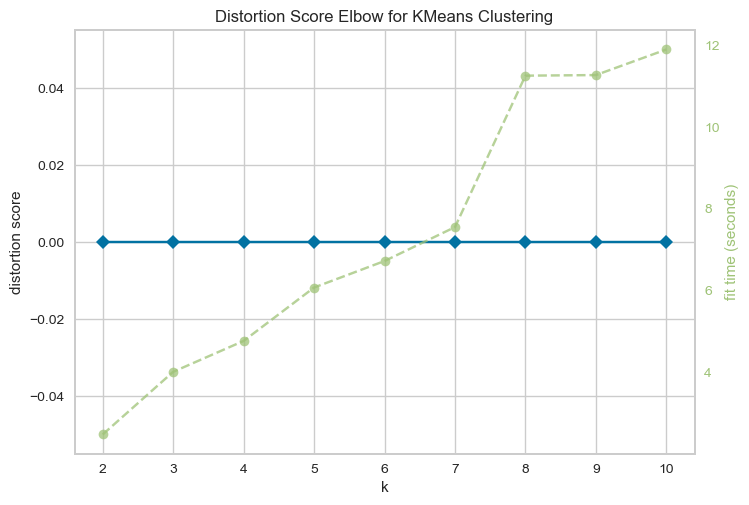

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
X = final_df[unique_violations].values.reshape(-1, 1)
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

In [95]:

final_df['INSPECTION DATE'] = pd.to_datetime(final_df['INSPECTION DATE'])

final_df['Year'] = final_df['INSPECTION DATE'].dt.year

count_per_year = final_df['Year'].value_counts().sort_index(ascending=True)

cumulative_count = count_per_year.cumsum()
total_count = cumulative_count.max()
cumulative_percentage = cumulative_count / total_count * 100


result_df = pd.DataFrame({'Count': count_per_year,'Cumulative Count': cumulative_count,'Cumulative Percentage': cumulative_percentage})

print("Number of rows per year (ascending order):")
print(result_df)

Number of rows per year (ascending order):
      Count  Cumulative Count  Cumulative Percentage
Year                                                
2015      6                 6               0.016028
2016    129               135               0.360635
2017    374               509               1.359726
2018    502              1011               2.700753
2019   1388              2399               6.408612
2020   1322              3721               9.940161
2021   3313              7034              18.790404
2022  14775             21809              58.259871
2023  14941             36750              98.172784
2024    684             37434             100.000000


In [ ]:
## We are working aproximatly with 60 -40 , considering the split by Date

In [96]:
filter_test = final_df[final_df['Year'].isin([2023, 2024])]

In [97]:
filter_train = final_df[final_df['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]

In [104]:
from sklearn.cluster import KMeans

X_train=filter_train[unique_violations]
X_test=filter_test[unique_violations]
y_train=filter_train['SCORE']
y_test=filter_test['SCORE']


kmeans = KMeans(n_clusters=7)  # Choose the number of clusters
kmeans.fit(X_train)

train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)


test_cluster_df = pd.DataFrame({'Test Data': y_test, 'Cluster': test_clusters})


average_score_by_cluster = test_cluster_df.groupby('Cluster')['Test Data'].mean()
print(average_score_by_cluster)

Cluster
0    10.768091
1    11.703291
2     6.739802
3    16.947478
4    13.053812
5     8.656352
6    13.205461
Name: Test Data, dtype: float64


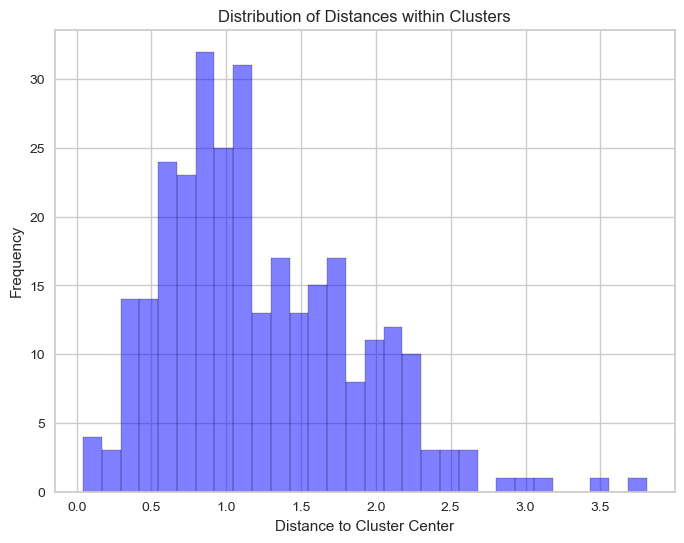

In [99]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

distances = np.sqrt(np.sum((X - centers[labels])**2, axis=1))

plt.figure(figsize=(8, 6))
plt.hist(distances, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Distance to Cluster Center')
plt.ylabel('Frequency')
plt.title('Distribution of Distances within Clusters')
plt.grid(True)
plt.show()


train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

filter_train['Cluster'] = train_clusters
filter_test['Cluster'] = test_clusters

combined_data = pd.concat([filter_train, filter_test], axis=0)

In [100]:
combined_data.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source
0,30075445-20210810,A,5.0,2021-08-10,30075445,MORRIS PARK BAKE SHOP,40.848231,-73.855972,0,0,...,0,0,0,0,0,0,0,2021,3,Training
2,30112340-20210805,B,16.0,2021-08-05,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,0,2021,5,Training
3,30112340-20220713,A,11.0,2022-07-13,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,0,2022,0,Training


In [105]:

filter_train['Cluster'] = train_clusters
filter_test['Cluster'] = test_clusters

filter_train['Data Source'] = 'Training'
filter_test['Data Source'] = 'Test'

combined_data = pd.concat([filter_train, filter_test], axis=0)


combined_data

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source
0,30075445-20210810,A,5.0,2021-08-10,30075445,MORRIS PARK BAKE SHOP,40.848231,-73.855972,0,0,...,0,0,0,0,0,0,0,2021,5,Training
2,30112340-20210805,B,16.0,2021-08-05,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,0,2021,3,Training
3,30112340-20220713,A,11.0,2022-07-13,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,0,2022,4,Training
5,30191841-20220104,A,12.0,2022-01-04,30191841,DJ REYNOLDS PUB AND RESTAURANT,40.767326,-73.984310,0,0,...,0,0,0,0,0,0,0,2022,0,Training
7,40356018-20191108,A,10.0,2019-11-08,40356018,RIVIERA CATERERS,40.579896,-73.982087,0,0,...,0,0,0,0,0,0,0,2019,0,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37429,50145229-20240122,A,5.0,2024-01-22,50145229,KUNG FU TEA,40.726835,-73.713513,0,0,...,0,0,0,0,0,0,0,2024,2,Test
37430,50145309-20240118,A,5.0,2024-01-18,50145309,STARBUCKS COFFEE,40.604237,-73.971791,0,0,...,0,0,0,0,0,0,0,2024,2,Test
37431,50145781-20240123,A,11.0,2024-01-23,50145781,CANTEEN,40.745602,-73.989516,0,0,...,0,0,0,0,0,0,0,2024,3,Test
37432,50145823-20240105,A,11.0,2024-01-05,50145823,BEAN HOUSE,40.771182,-73.803360,0,0,...,0,0,0,0,0,0,0,2024,3,Test


In [106]:
cluster_counts = combined_data['Cluster'].value_counts()
print(cluster_counts)

Cluster
3    8538
2    7970
0    5827
5    4399
1    4386
6    3204
4    3110
Name: count, dtype: int64


In [88]:
combined_data.to_csv('combined_data4.csv')

## We begin by __CLUSTER 0__

In [61]:

cluster_0 = combined_data[combined_data['Cluster'] == 0]

print(cluster_0.head(5))


                  KEY GRADE  SCORE INSPECTION DATE     CAMIS  \
3   30112340-20220713     A   11.0      2022-07-13  30112340   
10  40356483-20220819     A    2.0      2022-08-19  40356483   
15  40359480-20191001     A    9.0      2019-10-01  40359480   
19  40360045-20220105     A   12.0      2022-01-05  40360045   
23  40361998-20210811     A    7.0      2021-08-11  40361998   

                           DBA   Latitude  Longitude  02A  02B  ...  \
3                      WENDY'S  40.662652 -73.962081    0    0  ...   
10          WILKEN'S FINE FOOD  40.620112 -73.906989    0    0  ...   
15  1 EAST 66TH STREET KITCHEN  40.768547 -73.969581    0    0  ...   
19                 SEUDA FOODS  40.606187 -73.965466    0    1  ...   
23  STEVE CHU'S DELI & GROCERY  40.764571 -73.938825    0    0  ...   

    Steakhouse  Tapas  Tex-Mex  Thai  Turkish  Vegan  Vegetarian  Year  \
3            0      0        0     0        0      0           0  2022   
10           0      0        0     0    

In [93]:
cluster_0.to_csv('cluster0.csv')

In [62]:
sum_of_unique_violations = cluster_0[unique_violations].sum()

sum_table = pd.DataFrame(sum_of_unique_violations, columns=['Sum'])

sum_table_sorted = sum_table.sort_values(by='Sum', ascending=False)

print(sum_table_sorted)



       Sum
10F  11303
02G   1810
10B   1728
02B   1315
09C    618
..     ...
06C      0
03G      0
22F      0
06D      0
04B      0

[69 rows x 1 columns]


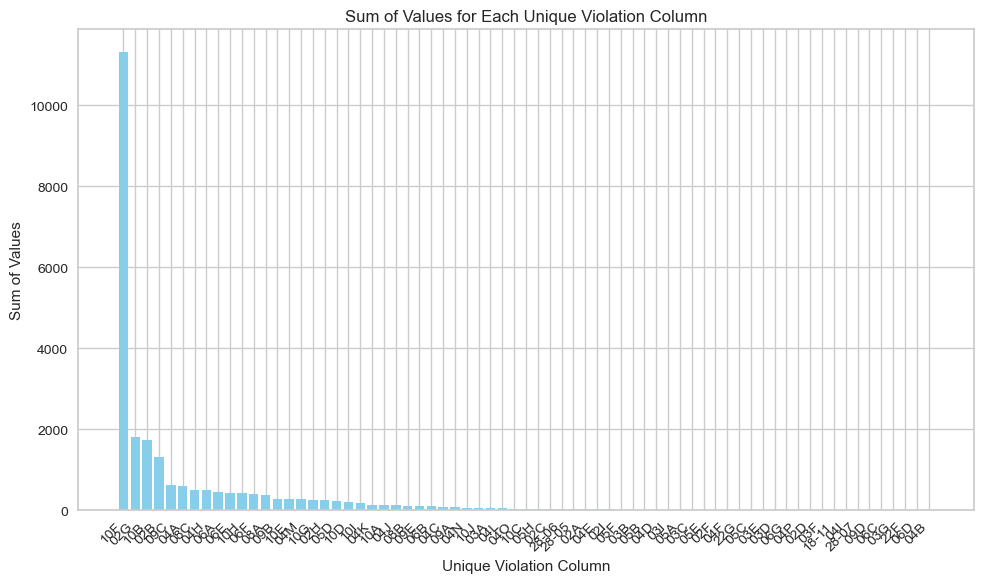

In [133]:
import matplotlib.pyplot as plt

sum_table_sorted = sum_table.sort_values(by='Sum', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sum_table_sorted.index, sum_table_sorted['Sum'], color='skyblue')
plt.xlabel('Unique Violation Column')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Unique Violation Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [107]:
import statsmodels.api as sm

X = cluster_0[unique_violations]
y = cluster_0['SCORE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1975.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:29:57   Log-Likelihood:                -20610.
No. Observations:               11243   AIC:                         4.134e+04
Df Residuals:                   11181   BIC:                         4.180e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10J            1.8914      0.225      8.400      0.0

In [108]:
cluster_0.head(2)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source
3,30112340-20220713,A,11.0,2022-07-13,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,0,2022,0,Training
10,40356483-20220819,A,2.0,2022-08-19,40356483,WILKEN'S FINE FOOD,40.620112,-73.906989,0,0,...,0,0,0,0,0,0,0,2022,0,Training


In [109]:
count_per_year_0 = cluster_0['Year'].value_counts().sort_index(ascending=True)

cumulative_count_0 = count_per_year_0.cumsum()
total_count_0 = cumulative_count_0.max()
cumulative_percentage_0 = cumulative_count_0 / total_count_0 * 100

result_df_0 = pd.DataFrame({'Count': count_per_year_0,'Cumulative Count': cumulative_count_0,'Cumulative Percentage': cumulative_percentage_0})

print("Number of rows per year (ascending order):")
print(result_df_0)

Number of rows per year (ascending order):
      Count  Cumulative Count  Cumulative Percentage
Year                                                
2015      2                 2               0.017789
2016     50                52               0.462510
2017    100               152               1.351952
2018    176               328               2.917371
2019    419               747               6.644134
2020    420              1167              10.379792
2021    938              2105              18.722761
2022   4202              6307              56.097127
2023   4664             10971              97.580717
2024    272             11243             100.000000


In [110]:
cluster_0 = cluster_0[cluster_0['SCORE'] != 0]

In [111]:
count_per_year_0 = cluster_0['Year'].value_counts().sort_index(ascending=True)

cumulative_count_0 = count_per_year_0.cumsum()
total_count_0 = cumulative_count_0.max()
cumulative_percentage_0 = cumulative_count_0 / total_count_0 * 100

result_df_0 = pd.DataFrame({'Count': count_per_year_0,'Cumulative Count': cumulative_count_0,'Cumulative Percentage': cumulative_percentage_0})

print("Number of rows per year (ascending order):")
print(result_df_0)

Number of rows per year (ascending order):
      Count  Cumulative Count  Cumulative Percentage
Year                                                
2015      2                 2               0.017789
2016     50                52               0.462510
2017    100               152               1.351952
2018    176               328               2.917371
2019    419               747               6.644134
2020    420              1167              10.379792
2021    938              2105              18.722761
2022   4202              6307              56.097127
2023   4664             10971              97.580717
2024    272             11243             100.000000


In [112]:
filter_test_0 = cluster_0[cluster_0['Year'].isin([2023, 2024])]
filter_train_0 = cluster_0[cluster_0['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_0[unique_violations]
X_test=filter_test_0[unique_violations]
y_train=filter_train_0['SCORE']
y_test=filter_test_0['SCORE']

In [113]:
y_test

20       13.0
40        2.0
43        2.0
46        3.0
48       12.0
         ... 
37411    10.0
37415     3.0
37428    11.0
37429     5.0
37430     5.0
Name: SCORE, Length: 4936, dtype: float64

In [114]:
len(filter_train_0)

6307

In [115]:
c0_X_train = sm.add_constant(X_train)
c0_X_test = sm.add_constant(X_test)
c0_lin_model = sm.OLS(y_train, c0_X_train)
results = c0_lin_model.fit()
c1_lin_pred_0 = results.predict(c0_X_test)
intercept_0 = results.params[0]
intercept_0

1.8929405706999516

In [121]:
from sklearn.metrics import mean_absolute_error

y_true = y_test  # Replace ... with your true target values
y_pred = c1_lin_pred_0

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape)

Mean Absolute Percentage Error (MAPE) 16.164839449853353


linear_regressor_pu_0 = LinearRegression()
linear_regressor_pu_0.fit(X_train, y_train)
reg_pu_coeff = pd.Series(linear_regressor_pu_0.coef_.flatten(), index=X_train.columns)
print(reg_pu_coeff)
pu_intercept_0 = linear_regressor_pu_0.intercept_
print(f'Intercept: {pu_intercept_0}')

y_pred_test_pu_0 = linear_regressor_pu_0.predict(X_test)
mse_predic_test_pu_0 = round(mean_squared_error(y_test, y_pred_test_pu_0), 3)
print(f'MSE: {mse_predic_test_pu_0}')

### KNN

In [122]:
# Pick k with lowes test mse
K_pu = np.argmin(mse_predic_test_pu_0)+1

print('The best K is:', K_pu)

The best K is: 1


In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor(n_neighbors=K_pu)

model.fit(X_train, y_train)

mse_train_pu_ = mean_squared_error(y_train, model.predict(X_train))

knn_pu_predictions = model.predict(X_test)

mse_test_pu = mean_squared_error(y_test, knn_pu_predictions)

mse_test_pu


9.703403565640194

### RIDGE

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [125]:
alphas = 10**np.linspace(-2,5,100)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 9.326033468832199


In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [127]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)  
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction = ridge.predict(X_test_scaled)

pu_ridge_mse = round(mean_squared_error(y_test, pu_ridge_prediction), 3)
pu_ridge_mse


2.989

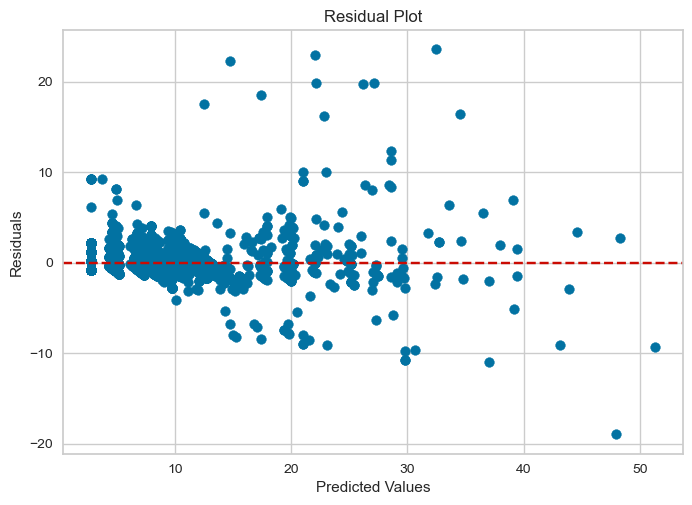

In [128]:
import matplotlib.pyplot as plt

residuals = y_test - pu_ridge_prediction

plt.scatter(pu_ridge_prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


### Predicting the values

In [129]:
filter_test_0['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_0['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)

In [131]:
merged_df_0 = pd.concat([filter_test_0, filter_train_0], ignore_index=True)
merged_df_0

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,40360045-20230131,A,13.0,2023-01-31,40360045,SEUDA FOODS,40.606187,-73.965466,0,0,...,0,0,0,0,0,0,2023,0,Test,14.525453
1,40363920-20230426,A,2.0,2023-04-26,40363920,NEW GOLDEN BILLION,40.662141,-73.927180,0,0,...,0,0,0,0,0,0,2023,0,Test,2.783646
2,40364220-20231101,A,2.0,2023-11-01,40364220,KOSHER BAGEL HOLE,40.625111,-73.962034,0,0,...,0,0,0,0,0,0,2023,0,Test,2.783646
3,40364305-20230123,A,3.0,2023-01-23,40364305,PHILADELPHIA GRILLE EXPRESS,40.612722,-74.033752,0,0,...,0,0,0,0,0,0,2023,0,Test,2.783646
4,40364335-20230321,A,12.0,2023-03-21,40364335,PETER LUGER STEAKHOUSE,40.709980,-73.962512,0,1,...,0,0,0,0,0,0,2023,0,Test,10.275351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,50130346-20221220,A,13.0,2022-12-20,50130346,LOS GIRASOLES BAKERY,40.683803,-73.871602,0,0,...,0,0,0,0,0,0,2022,0,Training,12.392142
11239,50130476-20221227,A,4.0,2022-12-27,50130476,QUEUE.BEER,40.674016,-73.998133,0,0,...,0,0,0,0,0,0,2022,0,Training,2.783646
11240,50130520-20221229,A,7.0,2022-12-29,50130520,SHAKE SHACK NEW YORK,40.609929,-73.922282,0,0,...,0,0,0,0,0,0,2022,0,Training,7.997187
11241,50130539-20221229,A,2.0,2022-12-29,50130539,STARBUCKS COFFEE COMPANY,40.639998,-73.918272,0,0,...,0,0,0,0,0,0,2022,0,Training,2.783646


In [132]:
merged_df_0.to_csv('merged_df0.csv')

import statsmodels.api as sm
import pandas as pd


X = cluster_0[unique_violations]  
y = cluster_0['SCORE']  
X = sm.add_constant(X)  

model0 = sm.OLS(y, X).fit() 

cluster_0['PREDICTED_SCORE'] = model0.predict(X) 

print(cluster_0.head()) 

### __CLUSTER 1__

In [168]:

cluster_1 = combined_data[combined_data['Cluster'] == 1]

print(cluster_1.head(5))

                   KEY GRADE  SCORE INSPECTION DATE     CAMIS             DBA  \
35   40363427-20220609     A   12.0      2022-06-09  40363427   BAGELS N BUNS   
66   40364581-20211129     A   13.0      2021-11-29  40364581        JUNIOR'S   
75   40365013-20220207     A   13.0      2022-02-07  40365013    CRYSTAL ROOM   
112  40365904-20220930     C   59.0      2022-09-30  40365904    MEE SUM CAFE   
140  40366497-20190624     A    8.0      2019-06-24  40366497  THE PUNCH BOWL   

      Latitude  Longitude  02A  02B  ...  Steakhouse  Tapas  Tex-Mex  Thai  \
35   40.610268 -74.146401    0    0  ...           0      0        0     0   
66   40.690200 -73.981624    0    0  ...           0      0        0     0   
75   40.592814 -74.070677    0    0  ...           0      0        0     0   
112  40.714861 -73.998200    0    1  ...           0      0        0     0   
140  40.885206 -73.900574    0    0  ...           0      0        0     0   

     Turkish  Vegan  Vegetarian  Year  Clust

In [169]:
sum_of_unique_violations_1 = cluster_1[unique_violations].sum()

sum_table1 = pd.DataFrame(sum_of_unique_violations_1, columns=['Sum'])

sum_table_sorted1 = sum_table1.sort_values(by='Sum', ascending=False)

print(sum_table_sorted1)

        Sum
06C    4386
10F    2023
06D     859
10B     716
02G     287
...     ...
03E       0
03D       0
18-11     0
28-07     0
04I       0

[69 rows x 1 columns]


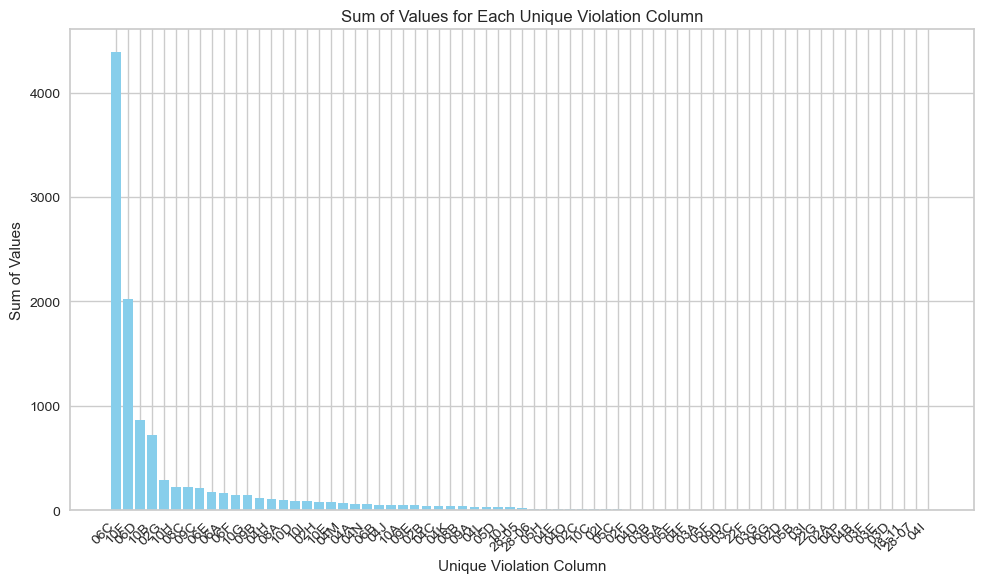

In [170]:
import matplotlib.pyplot as plt

sum_table_sorted1 = sum_table1.sort_values(by='Sum', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sum_table_sorted1.index, sum_table_sorted1['Sum'], color='skyblue')
plt.xlabel('Unique Violation Column')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Unique Violation Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [171]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = cluster_1[unique_violations]
y = cluster_1['SCORE']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     368.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:08:24   Log-Likelihood:                -9801.3
No. Observations:                4386   AIC:                         1.972e+04
Df Residuals:                    4325   BIC:                         2.011e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10J            2.4433      0.449      5.441      0.0

In [172]:
cluster_1 = cluster_1[cluster_1['SCORE'] != 0]

In [173]:
filter_test_1 = cluster_1[cluster_1['Year'].isin([2023, 2024])]
filter_train_1 = cluster_1[cluster_1['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_1[unique_violations]
X_test=filter_test_1[unique_violations]
y_train=filter_train_1['SCORE']
y_test=filter_test_1['SCORE']

### Linear Model

In [174]:
c1_X_train = sm.add_constant(X_train)
c1_X_test = sm.add_constant(X_test)
c1_lin_model = sm.OLS(y_train, c1_X_train)
results = c1_lin_model.fit()
c1_lin_pred_1 = results.predict(c1_X_test)
intercept_1 = results.params[0]
intercept_1

2.385681342798637

In [175]:
from sklearn.metrics import mean_absolute_error

y_true = y_test 
y_pred = c1_lin_pred_1

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape)

Mean Absolute Percentage Error (MAPE) 9.940231015146574


### Ridge

In [176]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)  
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction1 = ridge.predict(X_test_scaled)

pu_ridge_mse_1 = round(mean_squared_error(y_test, pu_ridge_prediction1), 3)
pu_ridge_mse_1

4.35

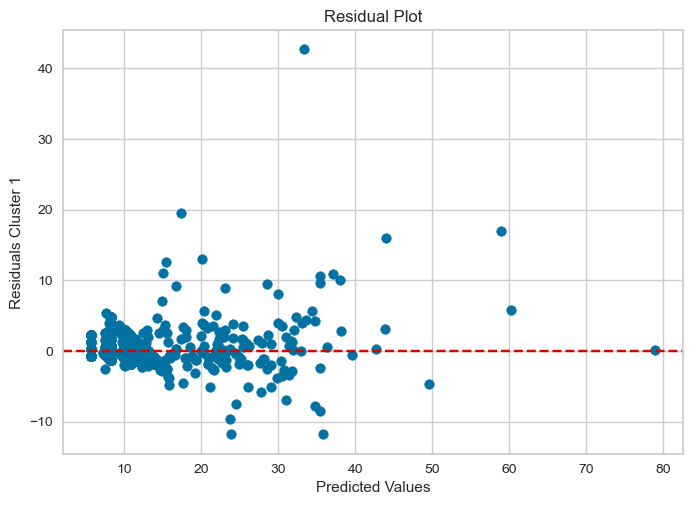

In [177]:
import matplotlib.pyplot as plt

residuals = y_test - pu_ridge_prediction1

plt.scatter(pu_ridge_prediction1, residuals)
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals Cluster 1')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [178]:
filter_test_1['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_1['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)

In [179]:
merged_df_1 = pd.concat([filter_test_1, filter_train_1], ignore_index=True)
merged_df_1.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,30191841-20230423,A,10.0,2023-04-23,30191841,DJ REYNOLDS PUB AND RESTAURANT,40.767326,-73.984310,0,0,...,0,0,0,0,0,0,2023,1,Test,10.545979
1,40365013-20230607,A,8.0,2023-06-07,40365013,CRYSTAL ROOM,40.592814,-74.070677,0,0,...,0,0,0,0,0,0,2023,1,Test,8.253095
2,40365387-20230320,A,7.0,2023-03-20,40365387,ARTURO'S,40.727234,-74.000516,0,0,...,0,0,0,0,0,0,2023,1,Test,8.253095


import statsmodels.api as sm
import pandas as pd


X = cluster_1[unique_violations]  
y = cluster_1['SCORE']  
X = sm.add_constant(X)  

model1 = sm.OLS(y, X).fit() 

cluster_1['PREDICTED_SCORE'] = model1.predict(X) 

print(cluster_1.head()) 


### __CLUSTER_2__

In [155]:
cluster_2 = combined_data[combined_data['Cluster'] == 2]

print(cluster_2.head(2))

                  KEY GRADE  SCORE INSPECTION DATE     CAMIS  \
10  40356483-20220819     A    2.0      2022-08-19  40356483   
15  40359480-20191001     A    9.0      2019-10-01  40359480   

                           DBA   Latitude  Longitude  02A  02B  ...  \
10          WILKEN'S FINE FOOD  40.620112 -73.906989    0    0  ...   
15  1 EAST 66TH STREET KITCHEN  40.768547 -73.969581    0    0  ...   

    Steakhouse  Tapas  Tex-Mex  Thai  Turkish  Vegan  Vegetarian  Year  \
10           0      0        0     0        0      0           0  2022   
15           0      0        0     0        0      0           0  2019   

    Cluster  Data Source  
10        2     Training  
15        2     Training  

[2 rows x 179 columns]


In [156]:
sum_of_unique_violations_2 = cluster_2[unique_violations].sum()

sum_table2 = pd.DataFrame(sum_of_unique_violations_2, columns=['Sum'])

sum_table_sorted2 = sum_table2.sort_values(by='Sum', ascending=False)

print(sum_table_sorted2)

        Sum
10F    7970
10B    1223
04A     516
04H     454
09C     445
...     ...
03G       0
18-11     0
28-07     0
09D       0
02G       0

[69 rows x 1 columns]


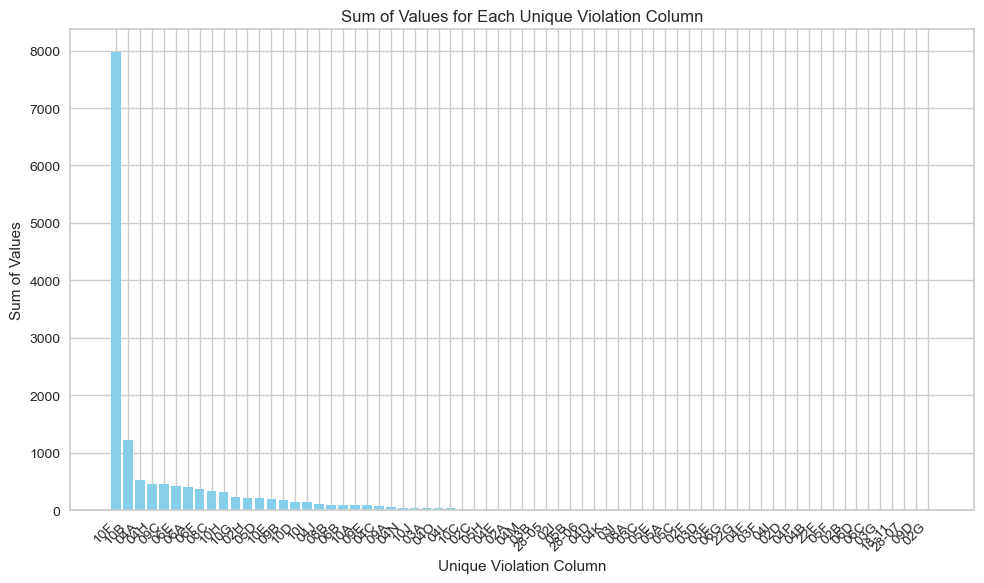

In [157]:
sum_table_sorted2 = sum_table2.sort_values(by='Sum', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sum_table_sorted2.index, sum_table_sorted2['Sum'], color='skyblue')
plt.xlabel('Unique Violation Column')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Unique Violation Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [158]:
cluster_2 = cluster_2[cluster_2['SCORE'] != 0]

In [159]:
filter_test_2 = cluster_2[cluster_2['Year'].isin([2023, 2024])]
filter_train_2 = cluster_2[cluster_2['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_2[unique_violations]
X_test=filter_test_2[unique_violations]
y_train=filter_train_2['SCORE']
y_test=filter_test_2['SCORE']

### Linear Model

In [160]:
c2_X_train = sm.add_constant(X_train)
c2_X_test = sm.add_constant(X_test)
c2_lin_model = sm.OLS(y_train, c2_X_train)
results = c2_lin_model.fit()
c1_lin_pred_2 = results.predict(c2_X_test)
intercept_2 = results.params[0]
intercept_2

1.868905886868938

In [161]:
from sklearn.metrics import mean_absolute_error

y_true = y_test 
y_pred = c1_lin_pred_2

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_2 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape_2)

Mean Absolute Percentage Error (MAPE) 18.76054010962058


### Ridge

In [162]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)  
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction2 = ridge.predict(X_test_scaled)

pu_ridge_mse_2 = round(mean_squared_error(y_test, pu_ridge_prediction2), 3)
pu_ridge_mse_2

2.062

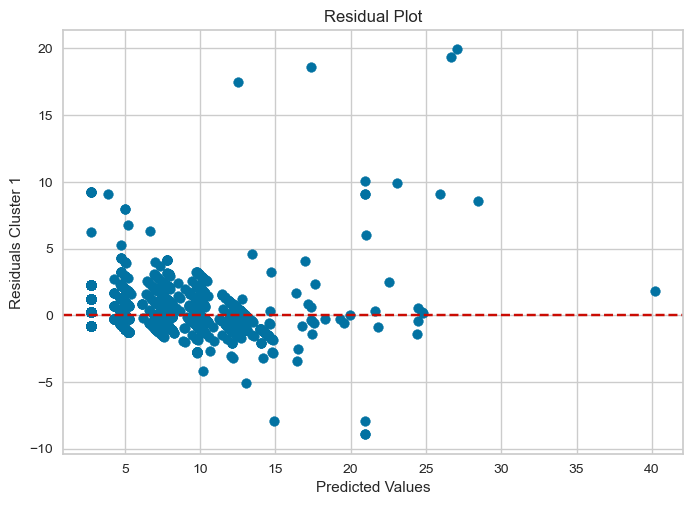

In [164]:
import matplotlib.pyplot as plt

residuals = y_test - pu_ridge_prediction2

plt.scatter(pu_ridge_prediction2, residuals)
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals Cluster 1')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

### Predicting Values

In [167]:
filter_test_2['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_2['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)
merged_df_2 = pd.concat([filter_test_2, filter_train_2], ignore_index=True)
merged_df_2.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,40363920-20230426,A,2.0,2023-04-26,40363920,NEW GOLDEN BILLION,40.662141,-73.927180,0,0,...,0,0,0,0,0,0,2023,2,Test,2.761011
1,40364220-20231101,A,2.0,2023-11-01,40364220,KOSHER BAGEL HOLE,40.625111,-73.962034,0,0,...,0,0,0,0,0,0,2023,2,Test,2.761011
2,40364305-20230123,A,3.0,2023-01-23,40364305,PHILADELPHIA GRILLE EXPRESS,40.612722,-74.033752,0,0,...,0,0,0,0,0,0,2023,2,Test,2.761011


## CLUSTER 3

In [181]:
cluster_3 = combined_data[combined_data['Cluster'] == 3]

print(cluster_3.head(2))

                 KEY GRADE  SCORE INSPECTION DATE     CAMIS  \
2  30112340-20210805     B   16.0      2021-08-05  30112340   
9  40356483-20220124     A    9.0      2022-01-24  40356483   

                  DBA   Latitude  Longitude  02A  02B  ...  Steakhouse  Tapas  \
2             WENDY'S  40.662652 -73.962081    0    0  ...           0      0   
9  WILKEN'S FINE FOOD  40.620112 -73.906989    0    0  ...           0      0   

   Tex-Mex  Thai  Turkish  Vegan  Vegetarian  Year  Cluster  Data Source  
2        0     0        0      0           0  2021        3     Training  
9        0     0        0      0           0  2022        3     Training  

[2 rows x 179 columns]


In [182]:
sum_of_unique_violations_3 = cluster_3[unique_violations].sum()
sum_table3 = pd.DataFrame(sum_of_unique_violations_3, columns=['Sum'])
sum_table_sorted3 = sum_table3.sort_values(by='Sum', ascending=False)
print(sum_table_sorted3)

      Sum
08A  8516
04L  5037
04N  3437
10F  2690
10B  1333
..    ...
03D     0
03G     0
22G     0
06G     0
04I     0

[69 rows x 1 columns]


In [183]:
cluster_3 = cluster_3[cluster_3['SCORE'] != 0]

In [184]:
filter_test_3 = cluster_3[cluster_3['Year'].isin([2023, 2024])]
filter_train_3 = cluster_3[cluster_3['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_3[unique_violations]
X_test=filter_test_3[unique_violations]
y_train=filter_train_3['SCORE']
y_test=filter_test_3['SCORE']

### Linear Model

In [185]:
c3_X_train = sm.add_constant(X_train)
c3_X_test = sm.add_constant(X_test)
c3_lin_model = sm.OLS(y_train, c3_X_train)
results = c3_lin_model.fit()
c1_lin_pred_3 = results.predict(c3_X_test)
intercept_3 = results.params[0]
intercept_3

4.715340259097413

In [186]:
from sklearn.metrics import mean_absolute_error

y_true = y_test 
y_pred = c1_lin_pred_3

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_3 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape_3)

Mean Absolute Percentage Error (MAPE) 9.7370988368465


### Ridge

In [188]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)  
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction3 = ridge.predict(X_test_scaled)

pu_ridge_mse_3 = round(mean_squared_error(y_test, pu_ridge_prediction3), 3)
pu_ridge_mse_3

16.943

### Predicting values

In [191]:
linear_model = LinearRegression()
X_train_scaled = scaler.transform(X_train)
linear_model.fit(X_train_scaled, y_train)
filter_test_3['PREDICTED_SCORE'] = linear_model.predict(X_test_scaled)
filter_train_3['PREDICTED_SCORE'] = linear_model.predict(X_train_scaled)
merged_df_3 = pd.concat([filter_test_3, filter_train_3], ignore_index=True)
merged_df_3.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,40.848231,-73.855972,0,0,...,0,0,0,0,0,0,2023,3,Test,12.423116
1,40356731-20230117,A,9.0,2023-01-17,40356731,TASTE THE TROPICS ICE CREAM,40.640795,-73.948488,0,0,...,0,0,0,0,0,0,2023,3,Test,10.133450
2,40360045-20230131,A,13.0,2023-01-31,40360045,SEUDA FOODS,40.606187,-73.965466,0,0,...,0,0,0,0,0,0,2023,3,Test,14.695683


### CLUSTER 4

In [192]:
cluster_4 = combined_data[combined_data['Cluster'] == 4]

print(cluster_4.head(2))

                 KEY GRADE  SCORE INSPECTION DATE     CAMIS               DBA  \
3  30112340-20220713     A   11.0      2022-07-13  30112340           WENDY'S   
8  40356018-20220201     A    7.0      2022-02-01  40356018  RIVIERA CATERERS   

    Latitude  Longitude  02A  02B  ...  Steakhouse  Tapas  Tex-Mex  Thai  \
3  40.662652 -73.962081    0    0  ...           0      0        0     0   
8  40.579896 -73.982087    0    0  ...           0      0        0     0   

   Turkish  Vegan  Vegetarian  Year  Cluster  Data Source  
3        0      0           0  2022        4     Training  
8        0      0           0  2022        4     Training  

[2 rows x 179 columns]


In [193]:
cluster_4 = cluster_4[cluster_4['SCORE'] != 0]

In [194]:
filter_test_4 = cluster_4[cluster_4['Year'].isin([2023, 2024])]
filter_train_4 = cluster_4[cluster_4['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_4[unique_violations]
X_test=filter_test_4[unique_violations]
y_train=filter_train_4['SCORE']
y_test=filter_test_4['SCORE']

### LINEAR MODEL

In [195]:
c4_X_train = sm.add_constant(X_train)
c4_X_test = sm.add_constant(X_test)
c4_lin_model = sm.OLS(y_train, c4_X_train)
results = c4_lin_model.fit()
c1_lin_pred_4 = results.predict(c4_X_test)
intercept_4 = results.params[0]
intercept_4

1.6459664027203877

In [196]:
from sklearn.metrics import mean_absolute_error

y_true = y_test 
y_pred = c1_lin_pred_4

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_4 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape_4)

Mean Absolute Percentage Error (MAPE) 10.162182058947206


### RIDGE

In [197]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)


X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)  
ridge.fit(scaler.transform(X_train), y_train)


pu_ridge_prediction4 = ridge.predict(X_test_scaled)

pu_ridge_mse_4 = round(mean_squared_error(y_test, pu_ridge_prediction4), 3)
pu_ridge_mse_4

6.962

### Prediction

In [199]:
filter_test_4['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_4['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)
merged_df_4 = pd.concat([filter_test_4, filter_train_4], ignore_index=True)
merged_df_4.head(5)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,40359705-20230426,A,13.0,2023-04-26,40359705,NATHAN'S FAMOUS,40.575537,-73.981652,0,0,...,0,0,0,0,0,0,2023,4,Test,9.951196
1,40364715-20230323,A,12.0,2023-03-23,40364715,OLD HOMESTEAD,40.741372,-74.005038,0,0,...,0,0,0,0,0,0,2023,4,Test,12.474185
2,40365789-20231228,A,13.0,2023-12-28,40365789,PATSY'S ITALIAN RESTAURANT,40.765618,-73.982398,0,0,...,0,0,0,0,0,0,2023,4,Test,12.502767
3,40366574-20231005,A,11.0,2023-10-05,40366574,BLARNEY STONE,40.706524,-74.013847,0,0,...,0,0,0,0,0,0,2023,4,Test,10.501824
4,40366961-20230427,A,12.0,2023-04-27,40366961,MITCHELL'S RESTAURANT,40.678850,-73.968417,0,0,...,0,0,0,0,0,0,2023,4,Test,13.324301


## CLUSTER 5

In [200]:
cluster_5 = combined_data[combined_data['Cluster'] == 5]
print(cluster_5.head(2))

                  KEY GRADE  SCORE INSPECTION DATE     CAMIS  \
0   30075445-20210810     A    5.0      2021-08-10  30075445   
21  40361618-20220201     A    5.0      2022-02-01  40361618   

                      DBA   Latitude  Longitude  02A  02B  ...  Steakhouse  \
0   MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...           0   
21             SAL'S DELI  40.781674 -73.839416    0    0  ...           0   

    Tapas  Tex-Mex  Thai  Turkish  Vegan  Vegetarian  Year  Cluster  \
0       0        0     0        0      0           0  2021        5   
21      0        0     0        0      0           0  2022        5   

    Data Source  
0      Training  
21     Training  

[2 rows x 179 columns]


In [201]:
cluster_5 = cluster_5[cluster_5['SCORE'] != 0]

In [202]:
filter_test_5 = cluster_5[cluster_5['Year'].isin([2023, 2024])]
filter_train_5 = cluster_5[cluster_5['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_5[unique_violations]
X_test=filter_test_5[unique_violations]
y_train=filter_train_5['SCORE']
y_test=filter_test_5['SCORE']

### LINEAR MODEL

In [203]:
c5_X_train = sm.add_constant(X_train)
c5_X_test = sm.add_constant(X_test)
c5_lin_model = sm.OLS(y_train, c5_X_train)
results = c5_lin_model.fit()
c1_lin_pred_5 = results.predict(c5_X_test)
intercept_5 = results.params[0]
intercept_5

-0.07323108374649157

In [204]:
from sklearn.metrics import mean_absolute_error

y_true = y_test 
y_pred = c1_lin_pred_5

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_5 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape_5)

Mean Absolute Percentage Error (MAPE) 8.169881893451999


### RIDGE

In [206]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)  
ridge.fit(scaler.transform(X_train), y_train)

pu_ridge_prediction5 = ridge.predict(X_test_scaled)

pu_ridge_mse_5 = round(mean_squared_error(y_test, pu_ridge_prediction5), 3)
pu_ridge_mse_5

4.305

### PREDICTION

In [209]:
filter_test_5['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_5['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)
merged_df_5 = pd.concat([filter_test_5, filter_train_5], ignore_index=True)
merged_df_5.head(2)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,30112340-20230721,A,9.0,2023-07-21,30112340,WENDY'S,40.662652,-73.962081,0,0,...,0,0,0,0,0,0,2023,5,Test,5.432111
1,40365577-20230605,A,5.0,2023-06-05,40365577,V & T RESTAURANT,40.803329,-73.963612,0,0,...,0,0,0,0,0,0,2023,5,Test,4.808049


## CLUSTER 6

In [210]:
cluster_6 = combined_data[combined_data['Cluster'] == 6]
print(cluster_6.head(2))

                  KEY GRADE  SCORE INSPECTION DATE     CAMIS           DBA  \
19  40360045-20220105     A   12.0      2022-01-05  40360045   SEUDA FOODS   
44  40364296-20220103     A   11.0      2022-01-03  40364296  HAPPY GARDEN   

     Latitude  Longitude  02A  02B  ...  Steakhouse  Tapas  Tex-Mex  Thai  \
19  40.606187 -73.965466    0    1  ...           0      0        0     0   
44  40.863649 -73.894240    0    1  ...           0      0        0     0   

    Turkish  Vegan  Vegetarian  Year  Cluster  Data Source  
19        0      0           0  2022        6     Training  
44        0      0           0  2022        6     Training  

[2 rows x 179 columns]


In [211]:
cluster_6 = cluster_6[cluster_6['SCORE'] != 0]

In [212]:
filter_test_6 = cluster_6[cluster_6['Year'].isin([2023, 2024])]
filter_train_6 = cluster_6[cluster_6['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
X_train=filter_train_6[unique_violations]
X_test=filter_test_6[unique_violations]
y_train=filter_train_6['SCORE']
y_test=filter_test_6['SCORE']

### LINEAR MODEL

In [213]:
c6_X_train = sm.add_constant(X_train)
c6_X_test = sm.add_constant(X_test)
c6_lin_model = sm.OLS(y_train, c6_X_train)
results = c6_lin_model.fit()
c1_lin_pred_6 = results.predict(c6_X_test)
intercept_6 = results.params[0]
intercept_6

1.818442600157535

In [214]:
from sklearn.metrics import mean_absolute_error

y_true = y_test 
y_pred = c1_lin_pred_6

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_6 = mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percentage Error (MAPE)", mape_6)

Mean Absolute Percentage Error (MAPE) 9.724153817541708


### RIDGE

In [216]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)  
ridge.fit(scaler.transform(X_train), y_train)

pu_ridge_prediction6 = ridge.predict(X_test_scaled)

pu_ridge_mse_6 = round(mean_squared_error(y_test, pu_ridge_prediction6), 3)
pu_ridge_mse_6

7.568

### PREDICTION

In [217]:
filter_test_6['PREDICTED_SCORE'] = ridge.predict(X_test_scaled)
X_train_scaled = scaler.transform(X_train)
filter_train_6['PREDICTED_SCORE'] = ridge.predict(X_train_scaled)
merged_df_6 = pd.concat([filter_test_6, filter_train_6], ignore_index=True)
merged_df_6.head(2)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,40364335-20230321,A,12.0,2023-03-21,40364335,PETER LUGER STEAKHOUSE,40.709980,-73.962512,0,1,...,0,0,0,0,0,0,2023,6,Test,10.338091
1,40364373-20230206,A,7.0,2023-02-06,40364373,ISLE OF CAPRI RESTURANT,40.762708,-73.965750,0,1,...,0,0,0,0,0,0,2023,6,Test,7.724897


### MERGING FINAL DATASET

In [249]:
merged_df_final = pd.concat([merged_df_0,merged_df_1, merged_df_2,merged_df_3,merged_df_4,merged_df_5,merged_df_6], ignore_index=True)
merged_df_final

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,Latitude,Longitude,02A,02B,...,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,Year,Cluster,Data Source,PREDICTED_SCORE
0,40360045-20230131,A,13.0,2023-01-31,40360045,SEUDA FOODS,40.606187,-73.965466,0,0,...,0,0,0,0,0,0,2023,0,Test,14.525453
1,40363920-20230426,A,2.0,2023-04-26,40363920,NEW GOLDEN BILLION,40.662141,-73.927180,0,0,...,0,0,0,0,0,0,2023,0,Test,2.783646
2,40364220-20231101,A,2.0,2023-11-01,40364220,KOSHER BAGEL HOLE,40.625111,-73.962034,0,0,...,0,0,0,0,0,0,2023,0,Test,2.783646
3,40364305-20230123,A,3.0,2023-01-23,40364305,PHILADELPHIA GRILLE EXPRESS,40.612722,-74.033752,0,0,...,0,0,0,0,0,0,2023,0,Test,2.783646
4,40364335-20230321,A,12.0,2023-03-21,40364335,PETER LUGER STEAKHOUSE,40.709980,-73.962512,0,1,...,0,0,0,0,0,0,2023,0,Test,10.275351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42352,50129928-20221220,A,12.0,2022-12-20,50129928,RIGOR HILL MARKET,40.719340,-74.006205,0,1,...,0,0,0,0,0,0,2022,6,Training,12.447997
42353,50129932-20221229,A,12.0,2022-12-29,50129932,KENNEDY FRIED CHICKEN AND PIZZA,40.863451,-73.900545,0,1,...,0,0,0,0,0,0,2022,6,Training,12.720522
42354,50129996-20221220,A,10.0,2022-12-20,50129996,FARMERS PIZZERIA,40.701266,-73.764919,0,1,...,0,0,0,0,0,0,2022,6,Training,10.338091
42355,50130484-20221220,A,12.0,2022-12-20,50130484,TIMBLENZ NATURAL MARKET,40.638220,-73.953408,0,1,...,0,0,0,0,0,0,2022,6,Training,11.850941


In [238]:
merged_df_final.to_csv('merged_final_1.csv')

In [247]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42357 entries, 0 to 42356
Columns: 180 entries, KEY to PREDICTED_SCORE
dtypes: datetime64[ns](1), float64(4), int32(170), int64(1), object(4)
memory usage: 30.7+ MB


### AGGREGATION

In [250]:
merged_df_final['ID RESTAURANT'] = merged_df_final['KEY'].apply(lambda x: x.split('-')[0])

key_index = merged_df_final.columns.get_loc('KEY')
merged_df_final.insert(key_index + 1, 'ID RESTAURANT', merged_df_final.pop('ID RESTAURANT'))



In [240]:
merged_df_final.to_csv('merged_final_2.csv')

In [245]:
weights = {2024: 2, 2023: 1, 2022: 0.5, 2021: 0.25, 2020: 0.125, 2019: 0.0625, 2018: 0.03125, 2017: 0.015625, 2016: 0.0078125, 2015: 0.00390625}

merged_df_final = merged_df_final.sort_values(by=['ID RESTAURANT', 'INSPECTION DATE'], ascending=[True, False])

merged_df_final['Year'] = merged_df_final['INSPECTION DATE'].dt.year


merged_df_final['WEIGHT'] = merged_df_final['Year'].map(weights)


merged_df_final['WEIGHTED_SCORE'] = merged_df_final.groupby('ID RESTAURANT').apply(lambda x: x['PREDICTED_SCORE'].rolling(window=len(x), min_periods=1).apply(lambda y: (x['PREDICTED_SCORE'] * x['WEIGHT'] / x['WEIGHT'].sum()).sum(), raw=True)).reset_index(drop=True)
myfinal_5 = merged_df_final.drop_duplicates('ID RESTAURANT').reset_index(drop=True)


columns_to_keep = ['ID RESTAURANT', 'WEIGHTED_SCORE','DBA','Latitude','Longitude']
myfinal_5 = myfinal_5[columns_to_keep]

print(myfinal_5)

      ID RESTAURANT  WEIGHTED_SCORE                             DBA  \
0          30075445        2.772329           MORRIS PARK BAKE SHOP   
1          30112340       23.047678                         WENDY'S   
2          30191841        2.772329  DJ REYNOLDS PUB AND RESTAURANT   
3          40356018        9.261730                RIVIERA CATERERS   
4          40356483        7.951441              WILKEN'S FINE FOOD   
...             ...             ...                             ...   
21203      50145229        2.772329                     KUNG FU TEA   
21204      50145309       13.644825                STARBUCKS COFFEE   
21205      50145781       12.524066                         CANTEEN   
21206      50145823       12.524066                      BEAN HOUSE   
21207      50145855       22.942395               CHINA RED EXPRESS   

        Latitude  Longitude  
0      40.848231 -73.855972  
1      40.662652 -73.962081  
2      40.767326 -73.984310  
3      40.579896 -73.982087

In [252]:
import pandas as pd

# Calculate year weights
weights = {
    2024: 2,
    2023: 1,
    2022: 0.5,
    2021: 0.25,
    2020: 0.125,
    2019: 0.0625,
    2018: 0.03125,
    2017: 0.015625,
    2016: 0.0078125,
    2015: 0.00390625
}

# Convert 'INSPECTION DATE' to datetime if not already
merged_df_final['INSPECTION DATE'] = pd.to_datetime(merged_df_final['INSPECTION DATE'])

# Calculate year from 'INSPECTION DATE'
merged_df_final['Year'] = merged_df_final['INSPECTION DATE'].dt.year

# Group by 'ID RESTAURANT'
grouped = merged_df_final.groupby('ID RESTAURANT')

# Define function to calculate weighted exponential smoothing average
def weighted_ema(group):
    weighted_values = group['PREDICTED_SCORE'] * group['Year'].map(weights)
    weighted_sum = weighted_values.sum()
    weights_sum = group['Year'].map(weights).sum()
    return weighted_sum / weights_sum

# Apply exponential smoothing average
aggregated_df = grouped.apply(weighted_ema)

# Drop the redundant 'ID RESTAURANT' and 'Year' columns
aggregated_df.drop(columns=['ID RESTAURANT', 'Year'], inplace=True)

# Reset index to flatten the DataFrame
aggregated_df.reset_index(drop=True, inplace=True)

# Display the aggregated DataFrame
print(aggregated_df)


0        10.984601
1         9.165300
2        10.545979
3         7.950253
4         5.161593
           ...    
21203     4.964598
21204     4.835037
21205    12.535689
21206     9.940121
21207     8.253095
Length: 21208, dtype: float64


In [255]:
import pandas as pd

# Calculate year weights
weights = {
    2024: 2,
    2023: 1,
    2022: 0.5,
    2021: 0.25,
    2020: 0.125,
    2019: 0.0625,
    2018: 0.03125,
    2017: 0.015625,
    2016: 0.0078125,
    2015: 0.00390625
}

# Convert 'INSPECTION DATE' to datetime if not already
merged_df_final['INSPECTION DATE'] = pd.to_datetime(merged_df_final['INSPECTION DATE'])

# Calculate year from 'INSPECTION DATE'
merged_df_final['Year'] = merged_df_final['INSPECTION DATE'].dt.year

# Group by 'ID RESTAURANT'
grouped = merged_df_final.groupby('ID RESTAURANT')

# Define function to calculate weighted exponential smoothing average
def weighted_ema(group):
    group['Weighted Score'] = group['PREDICTED_SCORE'] * group['Year'].map(weights)
    weighted_sum = group['Weighted Score'].sum()
    weights_sum = group['Year'].map(weights).sum()
    group['Exponential Smoothed Score'] = weighted_sum / weights_sum
    return group.iloc[0]  # return the first row of the group

# Apply exponential smoothing average
aggregated_df = grouped.apply(weighted_ema)

# Drop the redundant 'Year' and 'Weighted Score' columns
aggregated_df.drop(columns=['Year', 'Weighted Score','INSPECTION DATE'], inplace=True)

# Reset index to flatten the DataFrame
aggregated_df.reset_index(drop=True, inplace=True)

# Display the aggregated DataFrame
print(aggregated_df)


                     KEY ID RESTAURANT GRADE  SCORE     CAMIS  \
0      30075445-20230822      30075445     A   12.0  30075445   
1      30112340-20220713      30112340     A   11.0  30112340   
2      30191841-20230423      30191841     A   10.0  30191841   
3      40356018-20220201      40356018     A    7.0  40356018   
4      40356483-20220819      40356483     A    2.0  40356483   
...                  ...           ...   ...    ...       ...   
21203  50145229-20240122      50145229     A    5.0  50145229   
21204  50145309-20240118      50145309     A    5.0  50145309   
21205  50145781-20240123      50145781     A   11.0  50145781   
21206  50145823-20240105      50145823     A   11.0  50145823   
21207  50145855-20240122      50145855     A   10.0  50145855   

                                  DBA   Latitude  Longitude  02A  02B  ...  \
0               MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...   
1                             WENDY'S  40.662652 -73.962081    

In [257]:
max_score = aggregated_df['Exponential Smoothed Score'].max()

aggregated_df['Probabilistic risk Score'] = (aggregated_df['Exponential Smoothed Score'] / max_score) * 100

print(aggregated_df)


                     KEY ID RESTAURANT GRADE  SCORE     CAMIS  \
0      30075445-20230822      30075445     A   12.0  30075445   
1      30112340-20220713      30112340     A   11.0  30112340   
2      30191841-20230423      30191841     A   10.0  30191841   
3      40356018-20220201      40356018     A    7.0  40356018   
4      40356483-20220819      40356483     A    2.0  40356483   
...                  ...           ...   ...    ...       ...   
21203  50145229-20240122      50145229     A    5.0  50145229   
21204  50145309-20240118      50145309     A    5.0  50145309   
21205  50145781-20240123      50145781     A   11.0  50145781   
21206  50145823-20240105      50145823     A   11.0  50145823   
21207  50145855-20240122      50145855     A   10.0  50145855   

                                  DBA   Latitude  Longitude  02A  02B  ...  \
0               MORRIS PARK BAKE SHOP  40.848231 -73.855972    0    0  ...   
1                             WENDY'S  40.662652 -73.962081    

In [259]:
aggregated_df.to_csv('Dataset_aggregated_rev01.csv')

In [232]:
# Define weights
weights = {2024: 2, 2023: 1, 2022: 0.5, 2021: 0.25, 2020: 0.125, 2019: 0.0625, 2018: 0.03125, 2017: 0.015625, 2016: 0.0078125, 2015: 0.00390625}

# Sort DataFrame by restaurant ID and inspection date
merged_df_final = merged_df_final.sort_values(by=['ID RESTAURANT', 'INSPECTION DATE'], ascending=[True, False])

# Extract year from inspection date
merged_df_final['Year'] = merged_df_final['INSPECTION DATE'].dt.year

# Assign weights to each inspection year
merged_df_final['WEIGHT'] = merged_df_final['Year'].map(weights)

# Calculate weighted score for each restaurant
merged_df_final['WEIGHTED_SCORE'] = merged_df_final.groupby('ID RESTAURANT').apply(lambda x: x['PREDICTED_SCORE'].rolling(window=len(x), min_periods=1).apply(lambda y: (x['PREDICTED_SCORE'] * x['WEIGHT'] / x['WEIGHT'].sum()).sum(), raw=True)).reset_index(drop=True)

# Select only unique rows based on restaurant ID to keep final scores
myfinal_5 = merged_df_final.drop_duplicates('ID RESTAURANT').reset_index(drop=True)


violations_by_year = {}

for year in myfinal_5['Year'].unique():
    year_df = myfinal_5[myfinal_5['Year'] == year]
    violations = []
    for index, row in year_df.iterrows():
        for violation_col in unique_violations:
            # Check if the value is not NaN and is iterable (e.g., list)
            if isinstance(row[violation_col], list):
                violations.extend(map(str, row[violation_col]))  # Convert each element to string
            # If the value is not iterable, convert it to a string and append to violations
            elif pd.notna(row[violation_col]):
                violations.append(str(row[violation_col]))
    violations_string = '; '.join(set(violations))
    violations_by_year[year] = violations_string

# Create DataFrame from violations_by_year dictionary
violations_df = pd.DataFrame.from_dict(violations_by_year, orient='index', columns=['Violations'])

# Reset the index and rename the columns
violations_df.reset_index(inplace=True)
violations_df.rename(columns={'index': 'Year'}, inplace=True)

# Print the DataFrame
print(violations_df)






   Year Violations
0  2023       1; 0
1  2022       1; 0
2  2021       1; 0
3  2019       1; 0
4  2020       1; 0
5  2024       1; 0
6  2018       1; 0
7  2017       1; 0
8  2016       1; 0
9  2015       1; 0


In [229]:
print(unique_violations)

['10J', '09B', '02B', '06F', '04M', '09C', '09E', '02I', '10C', '04A', '10E', '04L', '04K', '10H', '06D', '10B', '06C', '10F', '09A', '08A', '02G', '10D', '08B', '08C', '06A', '04N', '04J', '10G', '04C', '04H', '05D', '10A', '10I', '06B', '02H', '06E', '03A', '02C', '28-06', '28-05', '02A', '22G', '05F', '05H', '03C', '04E', '03I', '04O', '05C', '03B', '04B', '06G', '05B', '04D', '02D', '04F', '04P', '05A', '02F', '22F', '03F', '03E', '05E', '03D', '03G', '18-11', '28-07', '09D', '04I']


In [80]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming filter_train and filter_test are defined and contain appropriate data
# Assuming unique_violations is a list of features for clustering

X_train = filter_train[unique_violations]
X_test = filter_test[unique_violations]
y_train = filter_train['SCORE']
y_test = filter_test['SCORE']

# Fit clustering model to training data
kmeans = KMeans(n_clusters=10, random_state=42)  # Choose the number of clusters
kmeans.fit(X_train)

# Predict clusters for training and testing data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Optionally, you can analyze the distribution of samples in each cluster for the test data
test_cluster_df = pd.DataFrame({'Test Data': y_test, 'Cluster': test_clusters})

# For example, you can calculate the average score for each cluster
average_score_by_cluster = test_cluster_df.groupby('Cluster')['Test Data'].mean()
print(average_score_by_cluster)

# Evaluate clustering performance 
# Consider using silhouette score or Davies–Bouldin index to evaluate clustering quality
from sklearn.metrics import silhouette_score

train_silhouette_score = silhouette_score(X_train, train_clusters)
print("Silhouette Score for Training Data:", train_silhouette_score)

test_silhouette_score = silhouette_score(X_test, test_clusters)
print("Silhouette Score for Test Data:", test_silhouette_score)


Cluster
0    20.747148
1     7.471533
2    11.333065
3    16.798429
4    13.161557
5     9.854208
6    11.100140
7    11.023983
8    16.196835
9    10.068540
Name: Test Data, dtype: float64
Silhouette Score for Training Data: 0.21845164908612005
Silhouette Score for Test Data: 0.19737287064562456


In [78]:
from sklearn.model_selection import KFold

# Assuming filter_train and filter_test are defined and contain appropriate data
# Assuming unique_violations is a list of features for clustering

X_train = filter_train[unique_violations]
X_test = filter_test[unique_violations]
y_train = filter_train['SCORE']
y_test = filter_test['SCORE']

# Number of clusters to evaluate
n_clusters = 4

# Initialize KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation loop
for train_index, test_index in kf.split(X_train):
    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the model to the training data
    kmeans.fit(X_train_fold)
    
    # Predict clusters for the validation data
    val_clusters = kmeans.predict(X_val_fold)
    
    # Evaluate clustering quality using silhouette score
    silhouette_avg = silhouette_score(X_val_fold, val_clusters)
    
    # Print silhouette score for each fold
    print(f"Silhouette score for fold: {silhouette_avg}")


Silhouette score for fold: 0.18453409231334297
Silhouette score for fold: 0.17956531266261838
Silhouette score for fold: 0.18946700356180107
Silhouette score for fold: 0.1955716916340204
Silhouette score for fold: 0.188448451727603


In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
import numpy as np

# Define range of K values to evaluate
k_values = range(2, 7)  # From 2 to 6 clusters

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store average silhouette scores for each K
avg_silhouette_scores = []

# Perform cross-validation loop for each K value
for n_clusters in k_values:
    silhouette_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_train_fold)
        val_clusters = kmeans.predict(X_val_fold)
        silhouette_scores.append(silhouette_score(X_val_fold, val_clusters))
    avg_silhouette_scores.append(np.mean(silhouette_scores))

# Find optimal K value that maximizes silhouette score
optimal_k = k_values[np.argmax(avg_silhouette_scores)]
print(f"Optimal number of clusters (K): {optimal_k}")


Optimal number of clusters (K): 2


## We run the linear regression 

### SCORE ~ BOROS

In [47]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = final_df[unique_boros]
y = final_df['SCORE']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                      -0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    -30.07
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               1.00
Time:                        16:24:14   Log-Likelihood:            -1.0917e+05
No. Observations:               36254   AIC:                         2.183e+05
Df Residuals:                   36248   BIC:                         2.184e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.507e+12   1.68e+12     -0.894

### SCORE ~ CUISINE

In [49]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = final_df[unique_cuisine]
y = final_df['SCORE']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     15.71
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          1.18e-226
Time:                        16:08:47   Log-Likelihood:            -1.0841e+05
No. Observations:               36254   AIC:                         2.170e+05
Df Residuals:                   36165   BIC:                         2.178e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### SCORE~VIOLATION CODE + BOROS

In [50]:
import statsmodels.api as sm

# Assuming unique_violations and unique_boros are lists of column names
X_violations = final_df[unique_violations]
X_boros = final_df[unique_boros]

# Merge the two sets of independent variables
X = pd.concat([X_violations, X_boros], axis=1)

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Prepare the dependent variable
y = final_df['SCORE']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     989.9
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:08:49   Log-Likelihood:                -89193.
No. Observations:               36254   AIC:                         1.785e+05
Df Residuals:                   36180   BIC:                         1.792e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.868e+11   1.85e+12     -0.209

### SCORE~VIOLATION CODE + CUISINE

In [51]:
X_violations = final_df[unique_violations]
X_cuisine = final_df[unique_cuisine]

# Merge the two sets of independent variables
X = pd.concat([X_violations, X_cuisine], axis=1)

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Prepare the dependent variable
y = final_df['SCORE']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     462.7
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:08:51   Log-Likelihood:                -89103.
No. Observations:               36254   AIC:                         1.785e+05
Df Residuals:                   36096   BIC:                         1.799e+05
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Correlation Violations ~ Boros

In [49]:

correlation_matrix = final_df[unique_violations + unique_boros].corr()
print(correlation_matrix)

correlation_matrix.to_csv('correlation.csv')


                    10J       09B       02B       06F       04M       09C  \
10J            1.000000 -0.004296 -0.013984 -0.011951 -0.009177 -0.014965   
09B           -0.004296  1.000000  0.020852  0.004585  0.002126  0.012459   
02B           -0.013984  0.020852  1.000000 -0.011537  0.007691 -0.012380   
06F           -0.011951  0.004585 -0.011537  1.000000 -0.021475 -0.002016   
04M           -0.009177  0.002126  0.007691 -0.021475  1.000000 -0.007994   
...                 ...       ...       ...       ...       ...       ...   
Bronx          0.003657 -0.003705  0.043187  0.020918  0.005565 -0.013058   
Brooklyn      -0.013871 -0.000597  0.012750 -0.020484  0.005402 -0.008626   
Manhattan      0.021950 -0.023234 -0.027257 -0.000344 -0.017690 -0.003064   
Queens        -0.010730  0.019820 -0.003483  0.005113  0.022818  0.028743   
Staten Island -0.005272  0.021514 -0.014834  0.006292 -0.025392 -0.016447   

                    09E       02I       10C       04A  ...       03G  \
10J

### Identifying correlated violations

In [53]:
correlation_matrix1 = final_df[unique_violations].corr()
print(correlation_matrix1)


            10J       09B       02B       06F       04M       09C       09E  \
10J    1.000000 -0.004296 -0.013984 -0.011951 -0.009177 -0.014965 -0.006666   
09B   -0.004296  1.000000  0.020852  0.004585  0.002126  0.012459 -0.000560   
02B   -0.013984  0.020852  1.000000 -0.011537  0.007691 -0.012380 -0.007909   
06F   -0.011951  0.004585 -0.011537  1.000000 -0.021475 -0.002016  0.014212   
04M   -0.009177  0.002126  0.007691 -0.021475  1.000000 -0.007994 -0.011478   
...         ...       ...       ...       ...       ...       ...       ...   
03G   -0.000385 -0.000833 -0.001861 -0.001003 -0.000962 -0.001197 -0.000477   
18-11 -0.000545 -0.001178  0.009164 -0.001418 -0.001361 -0.001692 -0.000675   
28-07 -0.000385 -0.000833 -0.001861 -0.001003 -0.000962  0.023052 -0.000477   
09D   -0.000944 -0.002040  0.015873 -0.002456  0.009736 -0.002931 -0.001169   
04I   -0.000385 -0.000833 -0.001861 -0.001003 -0.000962 -0.001197 -0.000477   

            02I       10C       04A  ...       22F 

Relevant Correlations:
       10J  09B  02B  06F  04M  09C  09E  02I  10C  04A  ...  22F  03F  03E  \
10J    1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
09B    NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
02B    NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
06F    NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
04M    NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
03G    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
18-11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
28-07  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
09D    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
04I    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

       05E  03D  03G  18-11 

<Axes: >

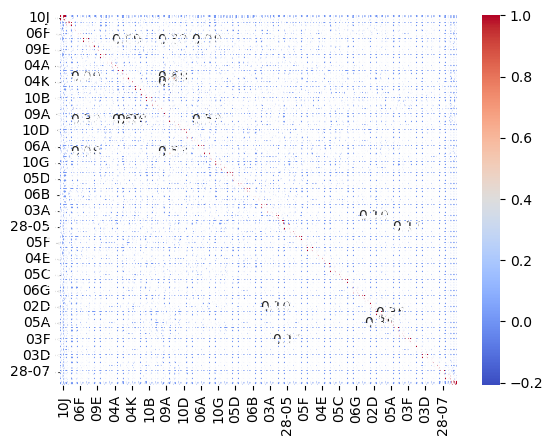

In [54]:

correlation_matrix = final_df[unique_violations].corr()

threshold = 0.5

relevant_correlations = correlation_matrix[
    (correlation_matrix >= threshold) | (correlation_matrix <= -threshold)
]

print("Relevant Correlations:")
print(relevant_correlations)

sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")


In [55]:
threshold = 0.5
relevant_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]


In [56]:
relevant_correlations

,10J,09B,02B,06F,04M,09C,09E,02I,10C,04A,...,22F,03F,03E,05E,03D,03G,18-11,28-07,09D,04I
10J,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09B,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02B,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06F,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04M,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
18-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
28-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
09D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [87]:
# Prepare the data for linear regression
X = final_df[unique_violations]
y = final_df['SCORE']
X.head()

,10J,09B,02B,06F,04M,09C,09E,02I,10C,04A,...,22F,03F,03E,05E,03D,03G,18-11,28-07,09D,04I
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# 20% split on pickup data
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [89]:
linear_regressor_pu = LinearRegression()
linear_regressor_pu.fit(X_train, y_train)
reg_pu_coeff = pd.Series(linear_regressor_pu.coef_.flatten(), index=X_train.columns)
print(reg_pu_coeff)
pu_intercept = linear_regressor_pu.intercept_
print(f'Intercept: {pu_intercept}')

10J      1.287730
09B      1.786496
02B      6.079234
06F      4.352159
04M      0.231964
           ...   
03G      6.563616
18-11    2.109126
28-07   -0.072196
09D      2.570257
04I      4.212129
Length: 69, dtype: float64
Intercept: 1.9093469509055279


### SCORE ~ VIOLATIONS CODE

In [90]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = final_df[unique_violations]
y = final_df['SCORE']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1047.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:37:38   Log-Likelihood:                -89201.
No. Observations:               36254   AIC:                         1.785e+05
Df Residuals:                   36184   BIC:                         1.791e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9184      0.041     47.354      0.0

In [58]:
r_squared = model.rsquared

In [59]:
print(r_squared)

0.6662356218585244


In [60]:
# After printing the summary, you can access the global p-value from the model object
print("Global p-value:", model.f_pvalue)


Global p-value: 0.0


In [61]:
# Prepare the data for linear regression
X = final_df[unique_violations]
y = final_df['SCORE']
X.head()

,10J,09B,02B,06F,04M,09C,09E,02I,10C,04A,...,22F,03F,03E,05E,03D,03G,18-11,28-07,09D,04I
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# 20% split on pickup data
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [63]:
X_train.columns

Index(['10J', '09B', '02B', '06F', '04M', '09C', '09E', '02I', '10C', '04A',
       '10E', '04L', '04K', '10H', '06D', '10B', '06C', '10F', '09A', '08A',
       '02G', '10D', '08B', '08C', '06A', '04N', '04J', '10G', '04C', '04H',
       '05D', '10A', '10I', '06B', '02H', '06E', '03A', '02C', '28-06',
       '28-05', '02A', '22G', '05F', '05H', '03C', '04E', '03I', '04O', '05C',
       '03B', '04B', '06G', '05B', '04D', '02D', '04F', '04P', '05A', '02F',
       '22F', '03F', '03E', '05E', '03D', '03G', '18-11', '28-07', '09D',
       '04I'],
      dtype='object')

In [65]:
linear_regressor_pu = LinearRegression()
linear_regressor_pu.fit(X_train, y_train)
reg_pu_coeff = pd.Series(linear_regressor_pu.coef_.flatten(), index=X_train.columns)
print(reg_pu_coeff)
pu_intercept = linear_regressor_pu.intercept_
print(f'Intercept: {pu_intercept}')

10J      1.287730
09B      1.786496
02B      6.079234
06F      4.352159
04M      0.231964
           ...   
03G      6.563616
18-11    2.109126
28-07   -0.072196
09D      2.570257
04I      4.212129
Length: 69, dtype: float64
Intercept: 1.9093469509055279


In [66]:
y_pred_sc = linear_regressor_pu.predict(X_train)
mse_predic_pu = round(mean_squared_error(y_train, y_pred_sc),3)
print(f'MSE: {mse_predic_pu}')

MSE: 7.948


In [67]:
y_pred_test_pu = linear_regressor_pu.predict(X_test)
mse_predic_test_pu = round(mean_squared_error(y_test, y_pred_test_pu), 3)
print(f'MSE: {mse_predic_test_pu}')

MSE: 8.438


### KNN REGRESSOR

In [90]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

mse_train = [-1]*30
mse_test = [-1]*30

for K in range(30):
    model5 = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model5.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model5.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model5.predict(X_test))

In [92]:
# Pick k with lowes test mse
K_pu = np.argmin(mse_test)+1

print('The best K is:', K_pu)

The best K is: 7


In [93]:
# Fit drop-off model with the best k
model = neighbors.KNeighborsRegressor(n_neighbors = K_pu)
model.fit(X_train, y_train)
mse_train_pu = mean_squared_error(y_train, model.predict(X_train))

knn_pu_predictions = model.predict(X_test)
mse_test_pu = mean_squared_error(y_test, model.predict(X_test))

In [94]:
mse_test_pu

10.251385452815796

### Building a geometric progression to use Exp. Moving Average

In [98]:
a=0.5
w_24=(1/(1-a))
w_23=(a/(1-a))
w_22=((a**2)/(1-a))
w_21=((a**3)/(1-a))
w_20=((a**4)/(1-a))
w_19=((a**5)/(1-a))
w_18=((a**6)/(1-a))
w_17=((a**7)/(1-a))
w_16=((a**8)/(1-a))
w_15=((a**9)/(1-a))

In [99]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [100]:
from tabulate import tabulate
data=[('Year','Weight'),('2024',w_24),('2023',w_23),('2022',w_22),('2021',w_21),('2020',w_20),('2019',w_19),('2018',w_18),('2017',w_17),('2016',w_16),('2015',w_15)]

In [101]:
print(tabulate(data,headers='firstrow',tablefmt='grid'))


+--------+------------+
|   Year |     Weight |
+========+============+
|   2024 | 2          |
+--------+------------+
|   2023 | 1          |
+--------+------------+
|   2022 | 0.5        |
+--------+------------+
|   2021 | 0.25       |
+--------+------------+
|   2020 | 0.125      |
+--------+------------+
|   2019 | 0.0625     |
+--------+------------+
|   2018 | 0.03125    |
+--------+------------+
|   2017 | 0.015625   |
+--------+------------+
|   2016 | 0.0078125  |
+--------+------------+
|   2015 | 0.00390625 |
+--------+------------+


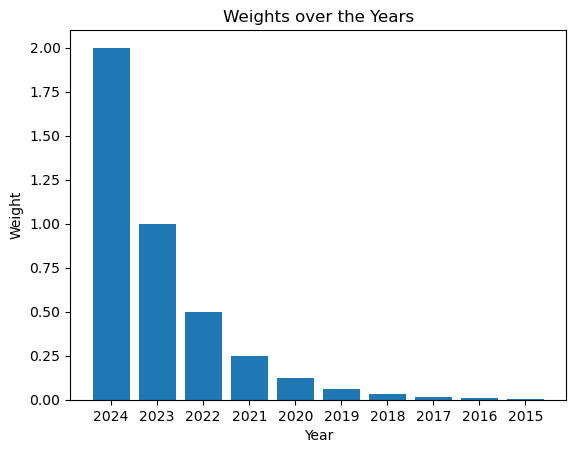

In [102]:
years = [entry[0] for entry in data[1:]]  
weights = [entry[1] for entry in data[1:]]  
plt.bar(years, weights)
plt.xlabel('Year')
plt.ylabel('Weight')
plt.title('Weights over the Years')
plt.show()

In [103]:


# Define the weights based on the year
weights = {2023: 2, 2022: 1, 2021: 0.5, 2020: 0.25, 2019: 0.125, 2018: 0.0625, 2017: 0.03125, 2016: 0.015625, 2015: 0.0078125}

# Assuming your original dataframe is called df


# Sort the dataframe by 'ID RESTAURANT' and 'INSPECTION DATE' in descending order
final_df = final_df.sort_values(by=['ID RESTAURANT', 'INSPECTION DATE'], ascending=[True, False])

# Calculate the year from 'INSPECTION DATE'
final_df['Year'] = final_df['INSPECTION DATE'].dt.year

# Calculate the weight based on the year
final_df['WEIGHT'] = final_df['Year'].map(weights)

# Calculate the weighted moving average of 'PREDICTED_SCORE'
final_df['WEIGHTED_SCORE'] = final_df.groupby('ID RESTAURANT').apply(lambda x: x['PREDICTED_SCORE'].rolling(window=len(x), min_periods=1).apply(lambda y: (x['PREDICTED_SCORE'] * x['WEIGHT'] / x['WEIGHT'].sum()).sum(), raw=True)).reset_index(drop=True)

# Create a new dataframe 'myfinal_5' by aggregating the rows based on 'ID RESTAURANT'
myfinal_5 = final_df.drop_duplicates('ID RESTAURANT').reset_index(drop=True)

# Drop unnecessary columns
myfinal_5 = myfinal_5.drop(['INSPECTION DATE', 'GRADE', 'SCORE', 'DBA', '02A', '02B', '02C', '02D', ...], axis=1)

# Print the final dataframe
print(myfinal_5)


KeyError: '[Ellipsis] not found in axis'

In [104]:

# Define the weights based on the year
weights = {2024: 2, 2023: 1, 2022: 0.5, 2021: 0.25, 2020: 0.125, 2019: 0.0625, 2018: 0.03125, 2017: 0.015625, 2016: 0.0078125, 2015: 0.00390625}

final_df = final_df.sort_values(by=['ID RESTAURANT', 'INSPECTION DATE'], ascending=[True, False])

final_df['Year'] = final_df['INSPECTION DATE'].dt.year


final_df['WEIGHT'] = final_df['Year'].map(weights)


final_df['WEIGHTED_SCORE'] = final_df.groupby('ID RESTAURANT').apply(lambda x: x['PREDICTED_SCORE'].rolling(window=len(x), min_periods=1).apply(lambda y: (x['PREDICTED_SCORE'] * x['WEIGHT'] / x['WEIGHT'].sum()).sum(), raw=True)).reset_index(drop=True)


myfinal_5 = final_df.drop_duplicates('ID RESTAURANT').reset_index(drop=True)


columns_to_keep = ['ID RESTAURANT', 'WEIGHTED_SCORE']
myfinal_5 = myfinal_5[columns_to_keep]

# Print the final dataframe
print(myfinal_5)


      ID RESTAURANT  WEIGHTED_SCORE
0          30075445       10.530805
1          30112340        7.396824
2          30191841       10.424472
3          40356018        8.176544
4          40356483        6.875010
...             ...             ...
22732      50145229        5.615221
22733      50145309        5.479248
22734      50145781       10.869870
22735      50145823        9.920030
22736      50145855        8.354662

[22737 rows x 2 columns]


In [187]:
max_score = myfinal_5['WEIGHTED_SCORE'].max()

myfinal_5['Probabilistic risk Score'] = (myfinal_5['WEIGHTED_SCORE'] / max_score) * 100

print(myfinal_5)


      ID RESTAURANT  WEIGHTED_SCORE  Probabilistic risk Score
0          30075445       10.530805                 19.956300
1          30112340        7.396824                 14.017279
2          30191841       10.424472                 19.754794
3          40356018        8.176544                 15.494879
4          40356483        6.875010                 13.028421
...             ...             ...                       ...
22732      50145229        5.615221                 10.641070
22733      50145309        5.479248                 10.383396
22734      50145781       10.869870                 20.598842
22735      50145823        9.920030                 18.798857
22736      50145855        8.354662                 15.832422

[22737 rows x 3 columns]


In [ ]:
myfinal_5['WEIGHTED_SCORE'].

In [1]:
!pip install jupyter-datatables

In [12]:
from jupyter_datatables import init_datatables_mode

In [11]:
pip install --upgrade jupyter

Note: you may need to restart the kernel to use updated packages.


In [13]:
init_datatables_mode()

CommError: Comms haven't been initialized properly.. HINT: Try reloading <F5> the window.

In [ ]:
import pandas as 

In [5]:
pd.read_csv('final_df_rev10.csv')

NameError: name 'pd' is not defined

In [199]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = myfinal_5[['WEIGHTED_SCORE']]


kmeans = KMeans(n_clusters=7)

kmeans.fit(X)

cluster_labels = kmeans.labels_

myfinal_5['Cluster'] = cluster_labels

C:\Users\Davic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [200]:
myfinal_5.head(10)

,ID RESTAURANT,WEIGHTED_SCORE,Probabilistic risk Score,Cluster
0,30075445,10.530805,19.956300,6
1,30112340,7.396824,14.017279,0
2,30191841,10.424472,19.754794,6
3,40356018,8.176544,15.494879,0
4,40356483,6.875010,13.028421,0
5,40356731,9.531564,18.062697,6
6,40357217,9.672182,18.329174,6
7,40359480,8.102780,15.355095,0
8,40359705,9.768077,18.510899,6
9,40360045,11.721937,22.213542,3


   Cluster  Count  Min Weighted Score  Max Weighted Score
0        0   1838            8.000114            8.820566
1        1  10636            8.821447           11.999822


In [ ]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
final_df["Cluster"] = labels

df.groupby("Cluster").Score.mean().sort_values()


In [201]:
myfinal_5.to_csv('final_df_rev10.csv')

#### We generate the Binary target Value

#### We know that a restaurnat fails when got a NON-'A' Score, then we create the Binary value as 1 (<=13)

In [ ]:
final_df['Target'] = np.where(final_df['PREDICTED_SCORE'] <= 13, 1, 0)

print(final_df.head())

#### We work with the logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
X = final_df[unique_violations]
y = final_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.30, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train, y_train)

# print coefficients and the intercept
print('The intercept beta_0 is ', model.intercept_, ' and the feature coefficients are ',model.coef_)

In [ ]:
# evaluate the logistic regression model's out-of-sample performance using test data
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # proportion of correctly classified

#### We use decision function f(x) and then plug into logistic formula

In [ ]:
f_x=model.decision_function(X_test)
print('Using decision function f(x) to score the 1st instance: ', f_x[0])

# confirm with manual calculation
cal=model.intercept_+model.coef_[:,0]*X_test[0,0]+model.coef_[:,1]*X_test[0,1]
print('Manual calculation to score the 1st instance: ', cal)

# convert f(x) to class probability using the formula provided
print('The estimated probability: ',np.exp(f_x[0])/(1+np.exp(f_x[0])))

In [ ]:
y_pred=model.predict_proba(X_test[[0]])
print(y_pred)

In [ ]:
# check the order of classes in the model
model.classes_

In [ ]:
# fit SVM with linear kernel
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=100) # set a large C to get hard-margin svm!
model.fit(X_train, y_train)

# print coefficients and the intercept
print(model.coef_)
print(model.intercept_)

# print coefficients and the intercept
print('The intercept beta_0 is ', model.intercept_, ' and the feature coefficients are ',model.coef_)

#### Get in-sample prediction performance

In [ ]:
y_pred=model.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
y_pred=model.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

#### Get out-sample prediction performance

In [ ]:
y_pred=model.predict(X_test)

accuracy_score(y_test, y_pred) # proportion of correctly classified

In [ ]:


# Print the DataFrame with the new column
print(final_df.head())





In [ ]:
final_df.to_csv('finaldf_rev04.csv')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



X = final_df[unique_violations]
y = final_df['SCORE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the scores on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('\nFeature Importances:')
print(feature_importances)

### We merge the data

In [61]:
merged_data=pd.read_csv('combined_df_2.csv')

In [66]:
merged_data.columns

Index(['CAMIS', 'i1', 'i2', 'i3', 'i4', 'i5', 'v1', 'v2', 'v3', 'v4', 'v5',
       'inspection_date_1', 'inspection_date_2', 'inspection_date_3',
       'inspection_date_4', 'inspection_date_5'],
      dtype='object')

In [83]:
import pandas as pd

for i in range(1, 6):
    merged_data[f'inspection_date_{i}'] = pd.to_datetime(merged_data[f'inspection_date_{i}'])

merged_data.set_index('inspection_date_1', inplace=True)

merged_data['moving_average'] = merged_data[['i1', 'i2', 'i3', 'i4', 'i5']].mean(axis=1)

merged_data.reset_index(inplace=True)



In [84]:
merged_data.head(5)

,inspection_date_1,CAMIS,i1,i2,i3,i4,i5,v1,v2,v3,v4,v5,inspection_date_2,inspection_date_3,inspection_date_4,inspection_date_5,moving_average
0,1970-01-01 00:00:00.020210810,30075445,5,12.0,NaN,NaN,NaN,06E,"04L,08A,08C",NaN,NaN,NaN,1970-01-01 00:00:00.020230822,NaT,NaT,NaT,8.5
1,1970-01-01 00:00:00.020210805,30112340,16,11.0,9.0,NaN,NaN,"02G,04N,08A","02G,10F","04M,10B",NaN,NaN,1970-01-01 00:00:00.020220713,1970-01-01 00:00:00.020230721,NaT,NaT,12.0
2,1970-01-01 00:00:00.020220104,30191841,12,10.0,NaN,NaN,NaN,"06D,10B,10F","06C,06E",NaN,NaN,NaN,1970-01-01 00:00:00.020230423,NaT,NaT,NaT,11.0
3,1970-01-01 00:00:00.020191108,40356018,10,7.0,NaN,NaN,NaN,"06D,09B,10F",02G,NaN,NaN,NaN,1970-01-01 00:00:00.020220201,NaT,NaT,NaT,8.5
4,1970-01-01 00:00:00.020220124,40356483,9,2.0,NaN,NaN,NaN,"04L,08A",10F,NaN,NaN,NaN,1970-01-01 00:00:00.020220819,NaT,NaT,NaT,5.5


In [54]:
final_df.head(5)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,02A,02B,02C,02D,...,Southeast Asian,Southwestern,Spanish,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian
0,30075445-20210810,A,5.0,2021-08-10,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30112340-20210805,B,16.0,2021-08-05,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30112340-20220713,A,11.0,2022-07-13,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30112340-20230721,A,9.0,2023-07-21,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
final_df.columns

Index(['KEY', 'GRADE', 'SCORE', 'INSPECTION DATE', 'CAMIS', 'DBA', '02A',
       '02B', '02C', '02D',
       ...
       'Southeast Asian', 'Southwestern', 'Spanish', 'Steakhouse', 'Tapas',
       'Tex-Mex', 'Thai', 'Turkish', 'Vegan', 'Vegetarian'],
      dtype='object', length=171)

In [61]:
def classify_score(score):
    if score <= 13:
        return 'A'
    elif score <= 27:
        return 'B'
    else:
        return 'C'
final_df['GRADEF'] = final_df['SCORE'].apply(classify_score)

In [62]:
final_df.head(5)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,02A,02B,02C,02D,...,Southwestern,Spanish,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,GRADEF
0,30075445-20210810,A,5.0,2021-08-10,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,30112340-20210805,B,16.0,2021-08-05,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
3,30112340-20220713,A,11.0,2022-07-13,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,30112340-20230721,A,9.0,2023-07-21,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


### MODELS BASED ON SEGEMENTATION GRADE

In [65]:
final_df['GRADEF'].unique()

array(['A', 'B', 'C'], dtype=object)

In [66]:
counts_per_grade = final_df['GRADEF'].value_counts()
print(counts_per_grade)

A    33382
B     2842
C       30
Name: GRADEF, dtype: int64


#### SEGMENT A

In [68]:
final_df_A = final_df[final_df['GRADEF'] == 'A']
final_df_A.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,02A,02B,02C,02D,...,Southwestern,Spanish,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,GRADEF
0,30075445-20210810,A,5.0,2021-08-10,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,30112340-20220713,A,11.0,2022-07-13,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [69]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = final_df_A[unique_violations]
y = final_df_A['SCORE']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     437.0
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:54:34   Log-Likelihood:                -78901.
No. Observations:               33382   AIC:                         1.579e+05
Df Residuals:                   33312   BIC:                         1.585e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2612      0.042     76.761      0.0

In [70]:
len(final_df_A)

33382

In [71]:
final_df_A['INSPECTION DATE'] = final_df['KEY'].apply(lambda x: pd.to_datetime(x.split('-')[1], format='%Y%m%d'))

C:\Users\Davic\AppData\Local\Temp\ipykernel_20056\3199984651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_A['INSPECTION DATE'] = final_df['KEY'].apply(lambda x: pd.to_datetime(x.split('-')[1], format='%Y%m%d'))


In [74]:
final_df_A.columns

Index(['KEY', 'GRADE', 'SCORE', 'INSPECTION DATE', 'CAMIS', 'DBA', '02A',
       '02B', '02C', '02D',
       ...
       'Southwestern', 'Spanish', 'Steakhouse', 'Tapas', 'Tex-Mex', 'Thai',
       'Turkish', 'Vegan', 'Vegetarian', 'GRADEF'],
      dtype='object', length=172)

In [78]:

final_df['INSPECTION DATE'] = pd.to_datetime(final_df['INSPECTION DATE'])

final_df['Year'] = final_df['INSPECTION DATE'].dt.year

count_per_year = final_df['Year'].value_counts().sort_index(ascending=True)

cumulative_count = count_per_year.cumsum()
total_count = cumulative_count.max()
cumulative_percentage = cumulative_count / total_count * 100


result_df = pd.DataFrame({'Count': count_per_year,'Cumulative Count': cumulative_count,'Cumulative Percentage': cumulative_percentage})

print("Number of rows per year (ascending order):")
print(result_df)


Number of rows per year (ascending order):
      Count  Cumulative Count  Cumulative Percentage
2015      6                 6               0.016550
2016    127               133               0.366856
2017    369               502               1.384675
2018    496               998               2.752800
2019   1348              2346               6.471010
2020   1294              3640              10.040271
2021   3243              6883              18.985491
2022  14308             21191              58.451481
2023  14379             35570              98.113312
2024    684             36254             100.000000


## We split Test -23/24 and Training the remaining (60-40)

In [84]:
filter_test_A = final_df[final_df['Year'].isin([2023, 2024])]
filter_test_A.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,02A,02B,02C,02D,...,Spanish,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,GRADEF,Year
1,30075445-20230822,A,12.0,2023-08-22,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,A,2023
4,30112340-20230721,A,9.0,2023-07-21,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,A,2023
6,30191841-20230423,A,10.0,2023-04-23,30191841,DJ REYNOLDS PUB AND RESTAURANT,0,0,0,0,...,0,0,0,0,0,0,0,0,A,2023


In [85]:
filter_train_A = final_df[final_df['Year'].isin([2015, 2016,2017,2018,2019,2020,2021,2022])]
filter_train_A.head(3)

,KEY,GRADE,SCORE,INSPECTION DATE,CAMIS,DBA,02A,02B,02C,02D,...,Spanish,Steakhouse,Tapas,Tex-Mex,Thai,Turkish,Vegan,Vegetarian,GRADEF,Year
0,30075445-20210810,A,5.0,2021-08-10,30075445,MORRIS PARK BAKE SHOP,0,0,0,0,...,0,0,0,0,0,0,0,0,A,2021
2,30112340-20210805,B,16.0,2021-08-05,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,B,2021
3,30112340-20220713,A,11.0,2022-07-13,30112340,WENDY'S,0,0,0,0,...,0,0,0,0,0,0,0,0,A,2022


In [110]:
selected_columns = unique_violations + unique_boros

In [111]:
X_train = filter_train_A[selected_columns]
y_train= filter_train_A['SCORE']
X_test = filter_test_A[selected_columns]
y_test= filter_test_A['SCORE']


### GRADE A -- LINNEAR REGRESSION

In [ ]:
### CONSIDERING SCORE ~ VIOLATIONS

In [103]:
linear_regressor_pu = LinearRegression()
linear_regressor_pu.fit(X_train[unique_violations], y_train)
reg_pu_coeff = pd.Series(linear_regressor_pu.coef_.flatten(), index=X_train[unique_violations].columns)
print(reg_pu_coeff)
pu_intercept = linear_regressor_pu.intercept_
print(f'Intercept: {pu_intercept}')

10J      1.263031
09B      1.695807
02B      5.225355
06F      3.819516
04M     -0.417815
           ...   
03G      6.281929
18-11    1.961078
28-07    0.029229
09D      2.749560
04I      3.761871
Length: 69, dtype: float64
Intercept: 2.8379780397453356


In [104]:
y_pred_sc = linear_regressor_pu.predict(X_train[unique_violations])
mse_predic_sc = round(mean_squared_error(y_train, y_pred_sc),3)
print(f'MSE: {mse_predic_sc}')

MSE: 10.893


In [ ]:
### CONSIDERING SCORE ~ BOROS

In [105]:
linear_regressor_pu2 = LinearRegression()
linear_regressor_pu2.fit(X_train[unique_boros], y_train)
reg_pu_coeff = pd.Series(linear_regressor_pu2.coef_.flatten(), index=X_train[unique_boros].columns)
print(reg_pu_coeff)
pu_intercept = linear_regressor_pu2.intercept_
print(f'Intercept: {pu_intercept}')

Bronx            4.891785e+12
Brooklyn         4.891785e+12
Manhattan        4.891785e+12
Queens           4.891785e+12
Staten Island    4.891785e+12
dtype: float64
Intercept: -4891784505712.034


In [106]:
y_pred_sc2 = linear_regressor_pu2.predict(X_train[unique_boros])
mse_predic_sc_2 = round(mean_squared_error(y_train, y_pred_sc2),3)
print(f'MSE: {mse_predic_sc_2}')

MSE: 22.777


In [ ]:
### CONSIDERING SCORE ~ BOROS+VIOLATIONS

In [112]:
linear_regressor_pu3 = LinearRegression()
linear_regressor_pu3.fit(X_train, y_train)
reg_pu_coeff3 = pd.Series(linear_regressor_pu3.coef_.flatten(), index=X_train.columns)
print(reg_pu_coeff3)
pu_intercept3 = linear_regressor_pu3.intercept_
print(f'Intercept: {pu_intercept}')

10J              1.271337e+00
09B              1.680091e+00
02B              5.222880e+00
06F              3.807029e+00
04M             -3.967766e-01
                     ...     
Bronx           -5.168419e+11
Brooklyn        -5.168419e+11
Manhattan       -5.168419e+11
Queens          -5.168419e+11
Staten Island   -5.168419e+11
Length: 74, dtype: float64
Intercept: -4891784505712.034


In [113]:
y_pred_sc3 = linear_regressor_pu3.predict(X_train)
mse_predic_sc_3 = round(mean_squared_error(y_train, y_pred_sc3),3)
print(f'MSE: {mse_predic_sc_3}')

MSE: 10.881


In [117]:
from rich.console import Console
from rich.table import Table
table = Table(title="MSE Data - SCORE ~ Features", show_header=True, header_style="bold black")
table.add_column("Independent variables", style="cyan", width=None)
table.add_column("MSE_Test", style="green", width=15)
table.add_row("SCORE~VIOLATION", f"{mse_predic_sc:.4f}")
table.add_row("SCORE~BORO",  f"{mse_predic_sc_2:.4f}")
table.add_row("SCORE~VIOLATION+BORO",f"{mse_predic_sc_3:.4f}")
console = Console()
console.print(table)

        MSE Data - SCORE ~ Features        
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Independent variables ┃ MSE_Test        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ SCORE~VIOLATION       │ 10.8930         │
│ SCORE~BORO            │ 22.7770         │
│ SCORE~VIOLATION+BORO  │ 10.8810         │
└───────────────────────┴─────────────────┘

### GRADE A -- RIDGE REGRESSION

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [114]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

In [95]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 65.79332246575676


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

pu_ridge_prediction = ridge.predict(scale(X_test))

pu_ridge_mse_A = round(mean_squared_error(y_test, pu_ridge_prediction), 3)
pu_ridge_mse_A 

22.119

### GRADE A -- LASSO

In [121]:
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)


In [122]:
lassocv = LassoCV(alphas=alphas)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.01


In [126]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
pu_lasso_prediction = lasso.predict(scale(X_test))

pu_lasso_mse = round(mean_squared_error(y_test, pu_lasso_prediction), 3)

pu_lasso_mse


5.86